# 1 - Introduction à la visualisation de données avec Bokeh 
## Introduction : Le dresseur Pokémon 
   Ce workshop a pour objectif de vous montrer les fonctionnalités de Bokeh, laissez-vous guider et essayez d'analyser les codes utilisés.
Bokeh est une bibliothèque de visualisation interactive qui cible les navigateurs Web modernes. Son but est de fournir une construction élégante et concise de graphiques polyvalents. Bokeh peut aider toute personne souhaitant créer rapidement et facilement des graphiques, des tableaux de bord et des applications de données interactifs. Vous trouverez ici une galerie de figures produites avec Bokeh.

Il existe de nombreux avantages à travailler avec Bokeh, les principaux étant :

- Visualisation interactive dans les navigateurs modernes
- Documents HTML autonomes ou applications avec serveur
- Graphiques expressifs et polyvalents
- Gestion de données volumineuses, dynamiques ou en continu (streaming)
- Utilisation facile en python (ou Scala, R,...)
Par ailleurs, Bokeh est une bibliothèque très riche, toutes ses fonctionnalités ne peuvent être traitées en un seul tutoriel. Cette formation fait le choix d'explorer certaines fonctions plus que d'autres, l'objectif général étant de rendre l'utilisateur autonome sur le module en fin de formation.

- Exécuter le code suivant

In [1]:
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
output_notebook()  # pour un affichage en ligne  ( leur version bokeh = 2.2.1 , moi ici 2.4.2 )

Loading BokehJS ...

Nous allons travailler avec les Pokémons dans cet exercice. Pokémon a commencé comme jeu de rôle (RPG), mais en raison de sa popularité croissante, ses propriétaires ont fini par produire de nombreuses séries télévisées, mangas, etc., ainsi que d'autres types de jeux vidéo (comme le célèbre Pokémon Go! ). Ce jeu de données est axé sur les les caractéristiques des Pokémon dans les jeux vidéos de la franchise.

NB : Ce jeu de de données n'inclut pas les pokémons correspondant à la dernière génération. (Juillet 2018)

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('pokemon.csv', index_col=0)
print(df.shape)
print(df.info())
df.head()

(800, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB
None


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Figure avec onglets
Les caractéristiques les plus intéressantes pour prédire l'issue d'un combat de Pokémon sont l'attaque et la défense. Ces caractéristiques présentent de grandes disparités selon si le Pokémon est légendaire ou non, c'est pourquoi nous traiterons ces Pokémon à part.    

Si vous êtes un fan de Pokémon, vous savez qu'il n'est possible de rencontrer un Pokémon légendaire qu'une fois.

Nous allons tracer la statistique de défense en fonction de la statistique d'attaque de tous les pokémon du jeu de données afin de voir si nous observons une corrélation.

Dans la figure ci-après, vous remarquerez la possibilité de créer des onglets selon que le pokémon soit légendaire ou non.

In [4]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool


source1=ColumnDataSource(df[(df["Legendary"]==True)])
source2=ColumnDataSource(df[(df["Legendary"]==False)])

hover = HoverTool(
        tooltips=[
            ("name", "@Name"),
            ("attack", "@Attack"),
            ("defense", "@Defense")])
 
p1 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p1.circle(x='Attack',y='Defense',source = source1,color='red',size=15)
p1.add_tools(hover)
tab1 = Panel(child=p1, title="Pokémons legendaires")

p2 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p2.circle(x='Attack',y='Defense',source = source2,color='blue',size=5)
p2.add_tools(hover)
tab2 = Panel(child=p2, title="Pokémons non legendaires")

tabs = Tabs(tabs=[ tab2, tab1 ])

show(tabs)

## Nuage de point coloré
En plus d'avoir des forces d'attaque et de défense, chaque Pokémon a un type.    
Nous allons reproduire le graphe précédent tout en ajoutant une coloration selon le type du Pokémon.    
C'est une visualisation pertinente car elle permet de savoir quels sont les Pokémon avec un profil plutôt offensif ou défensif pour chaque type.    
Cela permet de construire son équipe au mieux si on joue de manière compétitive.

In [5]:
df=df[(df["Type 1"]=='Dark')|(df["Type 1"]=='Electric')|(df["Type 1"]=='Grass')|
     (df["Type 1"]=='Ice')|(df["Type 1"]=='Rock')|(df["Type 1"]=='Water')|(df["Type 1"]=='Fire')]

def color_(x):
    Type=['Dark','Electric','Fire','Grass','Ice','Rock','Water']
    color=['darkorchid','yellow','darkorange','green','lightcyan','maroon','blue']
    return color[Type.index(x)]

df['color'] = df['Type 1'].apply(color_)

source1 = ColumnDataSource(df[(df["Legendary"]==True)])
source2 = ColumnDataSource(df[(df["Legendary"]==False)])

hover = HoverTool(
        tooltips=[
            ("name", "@Name"),
            ("attack", "@Attack"),
            ("defense", "@Defense")])
 
p1 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p1.circle(x='Attack',y='Defense',source = source1,color='color',size=15,legend_label='Type 1')
p1.add_tools(hover)
p1.legend.location = "top_left"
tab1 = Panel(child=p1, title="Pokémons légendaires")

p2 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p2.circle(x='Attack',y='Defense',source = source2,color='color',size=5,legend_label='Type 1')
p2.add_tools(hover)
p2.legend.location = "top_left"
tab2 = Panel(child=p2, title="Pokémons non légendaires")

tabs = Tabs(tabs=[ tab2, tab1 ])


show(tabs)

## Diagramme en barre
Votre principal objectif en tant qu’apprenti dresseur de Pokémons est de capturer des Pokémons puissants. Pour cela on vise ceux ayant une très bonne attaque, une très bonne défense ou idéalement les deux. Parmi les Pokémons ayant la meilleure attaque, on compte ceux de type roche, eau, ténèbres ou encore feu. Ceux qui ont la meilleure défense sont généralement de type eau.

Nous pouvons également nous intéresser à la distribution des types de Pokémon au sein du jeu. Visualisons ceci à l'aide d'un diagramme en barres.

In [6]:
from bokeh.transform import factor_cmap
count_type = pd.DataFrame(df.groupby('Type 1').size()).reset_index().rename(columns={0: "count"})

source = ColumnDataSource(count_type)
Type_cmap = factor_cmap('Type 1', palette=df['color'].unique(), factors=df['Type 1'].unique())
p = figure(plot_width=400, plot_height=400, x_range=count_type['Type 1'], title="nombre de pokémon par type")
p.vbar(x='Type 1', top='count', width=0.8, source=source,line_color=Type_cmap, fill_color=Type_cmap,legend_label='Type 1',
       hover_line_color="black")
p.add_tools(HoverTool(tooltips=[("count", "@count")]))

p.legend.location="top_left"
show(p)

## Histogramme intéractif
Nous allons maintenant regarder plus en détail la distribution de la statistique d'attaque des Pokémon, en fonction de leur type. Cela peut permettre d'estimer la probabilité d'avoir un Pokémon adverse avec une attaque supérieure à la vôtre, en connaissant son type.

In [7]:
import scipy.special

Type = ['Dark','Electric','Fire','Grass','Ice','Rock','Water']
color = ['darkorchid','yellow','darkorange','green','lightcyan','maroon','blue']

p = figure(title="attack hist per type",background_fill_color="lightcyan")

for i in Type :
    histogram, edges = np.histogram(df[df['Type 1']== i]['Attack'] , density=True, bins=50)
    source = ColumnDataSource(data=dict(histogram=histogram,left = edges[:-1], right = edges[1:]))
    p.quad( top = 'histogram', bottom = 0, left = 'left', right = 'right', 
             fill_color = color[Type.index(i)] , line_color = "black",
           source=source,hover_line_color="white",hover_fill_color='red',legend_label=str(i))
    hover = HoverTool(tooltips = [('valeur ', '@histogram'),
                          ('abscice', '$x')])
    p.add_tools(hover)

p.legend.click_policy="hide"
show(p)

# 2 - Tracer des nuages de points et des courbes 
## Premiers pas avec bokeh
Pour utiliser le module bokeh afin de créer des graphiques interactifs, il faut importer la classe figure du sous-module **bokeh.plotting**. Cette classe permet d'instancier un graphique pour y afficher différents types de dessins.

Pour indiquer le mode d'affichage ou de sauvegarde, les fonctions output_file, output_notebook et output_server du sous-module sont utilisées (parfois conjointement).

La fonction show permet d'afficher les graphiques et les mises en page.

Ainsi, pour créer et afficher des graphiques bokeh sur un notebook Jupyter, il faudra systématiquement éxécuter la cellule suivante au préalable:

In [8]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

L'instruction **output_notebook** permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
- Pour créer une courbe à partir de deux listes de coordonnées x et y, nous allons instancier une figure p et appeler sa méthode line avec les arguments x et y. Ensuite, pour afficher la courbe dans l'output de la cellule, il faut utiliser la fonction show dont l'argument doit être un objet de type figure.

- Lancer le code suivant pour créer et afficher un premier graphique.

In [9]:
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.plotting import show   # Importation de la fonction show qui permet d'afficher une figure.


# Instanciation d'une figure

p = figure()

# Listes de coordonnées

x = [1, 2, 3, 4, 5]  # abscisses de chaque point
y = [1, 2, 3, 4, 5]  # ordonnées de chaque point

# Création d'une courbe de type 'line' dans la figure p

p.line(x,    # abscisses
       y)    # ordonnées
      
# Affichage de la figure p dans l'output de la cellule
show(p) 

Le constructeur de la classe figure dispose de plusieurs paramètres qui permettent d'ajuster les outils et les aspects du graphique. Par exemple:

- plot_width ou plot_height permettent respectivement d'ajuster la largeur et la hauteur du graphique.
- title, x_axis_label et y_axis_label permettent d'ajouter un titre au graphique ou des labels aux axes.
- x_range et y_range permettent de délimiter les axes des abscisses et ordonnées.
  
     - La liste complète des paramètres du constructeur de la classe figure est accessible dans la documentation bokeh que vous pouvez trouver ici.   
     
Si aucun argument n'est donné, une figure de dimensions 600 x 600 est créée, et les outils par défaut sont ajoutés dans la barre d'outils située en haut à droite.

- Importer la classe figure depuis le sous-module bokeh.plotting.
- Importer la fonction show depuis le sous-module bokeh.plotting.
- Instancier une figure p de largeur 500 et de hauteur 400, avec pour titre: "Ma première courbe Bokeh".
- Tracer une ligne prenant en abscisse les valeurs [0,2,4,6,8] et en ordonnée les valeurs [1,4,4,8,12].

In [10]:
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.plotting import show   # Importation de la fonction show qui permet d'afficher une figure.


# Instanciation d'une figure

p = figure(plot_width = 500,                   # largeur de la figure
           plot_height = 400,                  # hauteur de la figure
           title = "Ma première courbe Bokeh") # titre

# Listes de coordonnées

x = [0, 2, 4, 6, 8]   # abscisses de chaque point
y = [1, 4, 4, 8, 12]  # ordonnées de chaque point


## Création d'une courbe de type 'line'

p.line(x,                # abscisses
       y,                # ordonnées
       line_width = 2)   # épaisseur du trait


## Affichage de la figure p dans l'output de la cellule

show(p)

Les méthodes comme line de la classe figure qui permettent de générer un type de graphique particulier sont appelées des méthodes **"glyph"** car elles instancient des objets de la classe Glyph de bokeh.   
Ces objets de type Glyph contiennent les attributs tels que la couleur, la forme ou les coordonnées des points, le type de graphique, etc., qui permettent à l'utilisateur de personnaliser un graphique.

C'est pourquoi les caractéristiques d'une courbe ou d'un nuage de points sont toujours définies en argument d'une méthode glyph et non dans le constructeur de la figure.

Dans l'exemple suivant, nous allons générer un nuage de points tel que les points sont représentés par des cercles de taille 10 et de couleur rouge.

    p = figure()  # Instanciation d'une figure
    p.circle(x, y, size=10, color='red')   # Création du nuage de points


- La méthode glyph circle génère un nuage de points où les points seront tous représentés par des cercles.
- Le paramètre size définit la taille des cercles.
- Le paramètre color définit la couleur des points.   

    - Les arguments size et color peuvent recevoir des listes, à la condition qu'elles soient de même taille que la liste des points à tracer. Ainsi, chaque point peut avoir sa propre taille et couleur.   
    
- Instancier une figure de dimensions 500 x 500 ( paramètres plot_width et plot_height ).
- Créer les listes :

   - x = [1, 2, 3, 4, 5] qui sera la liste des coordonnées en abscisse des deux nuages que nous allons dessiner.
   - y1 = [0, 2, 3, 8, 15] qui sera la liste des coordonnées en ordonnée du premier nuage.
   - y2 = [5, 8, 11, 16, 22] qui sera la liste des coordonnées en ordonnée du deuxième nuage.   

- Représenter les points de coordonnées x et y1 en noir en utilisant la méthode glyph circle.
- Représenter sur la même figure les points de coordonnées x et y2 grâce à la méthode glyph square avec les paramètres suivants:

- La taille des carrés doit être de 15.
- Le premier point doit être jaune ('yellow').
- Le deuxième point doit être orange ('orange').
- Le troisième point doit être rouge ('red').
- Le quatrième point doit être rose ('pink').
- Le cinquième point doit être violet ('purple').

   - Pour afficher plusieurs graphes sur une seule figure, il suffit d'appeler plusieurs méthodes sur un même objet de classe figure.

In [11]:
## Instanciation d'une figure

p = figure(plot_width = 500,   # largeur
           plot_height = 500)  # hauteur

# Listes de coordonnées

x = [1, 2, 3, 4, 5]       # abscisses des points des deux nuages
y1 = [0, 2, 3, 8, 15]     # ordonnées des points du premier nuage
y2 = [5, 8, 11, 16, 22]   # ordonnées des points du second nuage

# Création du premier nuage de points

p.circle(x, y1, color = 'black')

# Liste des couleurs du second nuage de points

colors = ['yellow',         # point 1 : jaune
          'orange',         # point 2 : orange
          'red',            # point 3 : rouge
          'pink',           # point 4 : rose
          'purple']         # point 5 : violet


## Création du second nuage de points

p.square(x,               # abscisses
         y2,              # ordonnées
         color = colors,  # couleurs
         size = 15)       # taille des carrés

## Affichage de la figure

show(p)

Pour donner plus de style à vos graphiques, il est possible de personnaliser l'apparence des lignes, le remplissage des formes et l'aspect du texte au sein des méthodes glyph.

Les paramètres les plus communs pour personnaliser l'apparence des lignes sont :

- line_color : couleur des lignes.
- line_alpha : opacité des lignes. Doit être entre 0 et 1.
- line_width : épaisseur des lignes.
- line_dash : style de tracé des lignes (pointillés, point-tiret, etc). Peut prendre les valeurs 'dashed','dotted','dotdash','dashdot' (et d'autres encore) pour différents styles de tracés.   

Pour l'apparence visuelle des zones remplies :

- fill_color : couleur de remplissage.
- fill_alpha : opacité du remplissage. Doit être entre 0 et 1.   

Pour l'apparence des textes du graphique

- text_font : police du texte.
- text_font_size : taille de police du texte.
- text_color : couleur du texte.
- text_alpha: opacité du texte.   

Le paramètre legend, présent dans toutes les méthodes, permet d'ajouter une légende à chaque graphique.

Nous allons essayer de reproduire du mieux possible le graphique suivant :

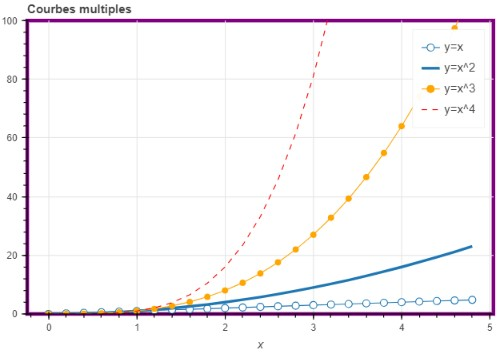

Pour cela:

- Instancier une figure nommée q telle que:
- Le titre soit "Courbes multiples".
- Le label d'axis soit "x" et celui d'ordonnée "y".
- Ses dimensions soient de 600 en largeur et 400 en hauteur.
- L'axe des ordonnées se restreindra à l'intervalle [0, 100]. Pour cela, vous pourrez utiliser le paramètre y_range du constructeur de la classe figure.

In [12]:
q = figure(title = "Courbes multiples",  # Titre de la figure
           x_axis_label = 'x',           # Label de l'axe des abscisses
           y_axis_label = 'y',           # Label de l'axe des ordonnées
           plot_height = 400,            # Hauteur de la figure
           plot_width = 600,             # Largeur de la figure
           y_range = [0, 100])           # Etendue de l'axe des ordonnées

La première courbe que nous allons tracer est celle correspondant à la fonction  f(x)=xf(x)=x . Cette courbe est spéciale parce qu'elle combine deux méthodes glyph, circle et line, pour créer un style de tracé particulier.

- Creér une liste de coordonnées x allant 0 à 5 avec un pas de 0,2. Pour cela, vous pourrez utiliser la fonction arange du module numpy.
- Créer dans la figure précédente une courbe correspondant à la fonction  f(x)=xf(x)=x  en utilisant la méthode glyph line. La légende de cette courbe devra être "y = x".
- Créer dans cette même figure un nuage de points en forme de cercle correspondant à la foncion  f(x)=xf(x)=x  en utilisant la méthode glyph circle de la manière suivante:  
   - La légende du nuage devra aussi être "y = x".
   - La couleur de remplissage des cercles doit être blanche. Le paramètre correspondant est fill_color.
   - La taille des cercles doit être de 8. Le paramètre correspondant est size.
- Afficher la figure.   
   - Si vous n'obtenez pas l'effet désiré, vous pouvez toujours réinstancier la figure grâce aux cellules précédentes.

In [13]:
# Création d'une liste d'abscisses allant de 0 à 5 avec un pas de 0,2

from numpy import arange

x = arange(0, 5, 0.2)

# Création d'une courbe correspondant à f(x) = x

q.line(x,                 # abscisses
       x,                 # ordonnées
       legend = "y = x")  # légende
      

# Création d'un nuage de points en forme de cercle

q.circle(x,                  # abscisses
         x,                  # ordonnées
         legend = "y = x",   # légende
         fill_color="white", # couleur de remplissage des cercles
         size = 8)           # taille des cercles

# Affichage de la figure

show(q)

Nous allons maintenant essayer de reproduire la courbe correspondant à la fonction  f(x)=x3f(x)=x3  telle qu'elle est représentée sur ce graphique.

Cette courbe fusionne aussi l'effet des méthodes glyph line et circle.

- Creér une liste de coordonnées y3 correspondant à l'image de la liste de coordonnées x par la fonction  f(x)=x3f(x)=x3 .
- En vous inspirant de l'exercice précedent, obtenir le même style de tracé pour la courbe de la fonction  f(x)=x3f(x)=x3 :
   - La légende de cette courbe devra être "y = x^3".
   - Sa couleur devra être orange. Les paramètres correspondants sont line_color pour la méthode line et color pour la méthode circle.
   - La taille des cercles devra être de 6.   
- Afficher la figure.

In [14]:
# Liste d'ordonnées de la fonction f(x) = x^3

y3 = x ** 3

# Création d'une courbe correspondant à f(x) = x^3

q.line(x,                          # abscisses
       y3,                         # ordonnées
       legend = "y = x^3",         # légende
       line_color = "orange")      # couleur des lignes
      
# Création d'un nuage de points en forme de cercle

q.circle(x,                        # abscisses
         y3,                       # ordonnées
         legend = "y = x^3",       # légende
         color = "orange",         # couleur des cercles
         size = 6)                 # taille des cercles
        
# Affichage de la figure

show(q)

Les dernières courbes du graphique correspondant aux fonctions  f(x)=x²  et  f(x)=x^4  sont simplement des lignes, mais la courbe de la fonction  f(x)=x^4  est tracée avec des tirets.

Pour obtenir cet effet, la méthode glyph line dispose d'un paramètre line_dash qui peut prendre les valeurs :

    - "dashed" : tracé en tirets.
    - "dotted" : tracé en pointillé.
    - "dotdash" ou "dashdot" : tracé alterné entre tirets et pointillé (Les deux arguments sont équivalents).   

- Créer les listes de coordonnées y2 et y4 correspondant aux images de la liste de coordonnées x par les fonctions  f(x)=x2f(x)=x2  et  f(x)=x4f(x)=x4 .
- Dessiner la courbe correspondant à la fonction  f(x)=x² :
- La légende de cette courbe doit être "y = x^2".  
    - La couleur des lignes doit être bleue.
    - L'épaisseur des lignes doit être de 3. Le paramètre correspondant est line_width.
- Dessiner la courbe correspondant à la fonction  f(x)=x4f(x)=x4 :
   - La légende de cette courbe doit être "y = x^4".
   - La couleur des lignes doit être rouge.
   - Le tracé des lignes doit être fait avec des tirets.
- Afficher la figure.

In [15]:
# Listes d'ordonnées

y2 = x ** 2   
y4 = x ** 4

# Création d'une courbe correspondant à f(x) = x^2

q.line(x,                    # abscisses
       y2,                   # ordonnées
       legend = "y = x^2",   # légende
       line_color = "blue",  # couleur des lignes
       line_width = 3)       # épaisseur des lignes

# Création d'une courbe correspondant à f(x) = x^4

q.line(x,                    # abscisses
       y4,                   # ordonnées
       legend = "y = x^4",   # légende
       line_color = "red",   # couleur des lignes
       line_dash = "dashed") # style de tracé                                                       

# Affichage de la figure

show(q)

## Les méthodes glyph 
Les méthodes glyph retournent des objets de type GlyphRenderer. Ces objets contiennent les attributs qui définissent la source des données du graphe et la glyphe à dessiner.

Une fois ces objets GlyphRenderer instanciés, il est possible de les personnaliser ou de les modifier, comme dans l'exemple ci-dessous:

    p = figure(plot_width=500, plot_height=500) # instanciation de la figure
    r1 = p.circle(x, y1,legend='y1')            # instanciation d'un nuage de points en forme de cercles
    r1.glyph.size = 5                           # modification de la taille des cercles
    r1.glyph.color = 'green'                    # modification de la couleur des cercles   
    
L'attribut glyph de r1 nous permet d'accéder au nuage de points qui doit être dessiné.

- Créer les listes de coordonnées x = [1, 2, 3, 4, 5], y1 = [1, 15, 5, 18, 13] et y2 = [5, 9, 10, 15, 25].
- Dans une figure de taille 600x600: afficher les points de coordonnées  (x,y1)(x,y1)  avec la légende 'y1' dans un nuage de points en forme de cercles et stocker la sortie de la méthode glyphe dans un objet nommé r1.
- A l'aide des attributs de r1, faites en sorte que:
   - Les points aient une taille de 50. L'attribut correspondant est size.
   - L'intérieur des points ait une opacité 0,2. L'attribut correspondant est fill_alpha.
   - Le contour des points soit tracé en style pointillé. L'attribut correspondant est line_dash.
   - La couleur du contour des points soit firebrick. L'attribut correspondant est line_color.
   - L'épaisseur du contour des points soit de 2. L'attribut correspondant est line_width.
- Tracer une courbe à partir de x et y2, avec une ligne bleue d'épaisseur 1 tracée en style alterné pointillé-tirets dont la légende est 'y2'.
- Afficher la figure.

In [16]:
# Liste d'abscisses

x = [1, 2, 3, 4, 5]

# Liste d'ordonnées

y1 = [1, 15, 5, 18, 13]
y2 = [5, 9, 10, 15, 25]

# Instanciation de la figure

p = figure(plot_width = 600,           # largeur de la figure
           plot_height = 600)          # hauteur de la figure

# Instanciation d'un nuage de points en forme de cercle de coordonnées (x,y1)

r1 = p.circle(x,                  # abscisses
              y1,                 # ordonnées
              legend = 'y1')      # légende

# Modification du nuage de points. L'accès à l'instance du nuage de points se fait grâce à l'attribut glyph de r1.

r1.glyph.size = 50                   # taille des points
r1.glyph.fill_alpha = 0.2            # opacité de l'intérieur des points
r1.glyph.line_color = 'firebrick'    # couleur du contour des cercles
r1.glyph.line_dash = 'dashed'        # style de tracé du contour des cercles
r1.glyph.line_width = 2              # épaisseur de contour des cercles

# Instanciation d'une courbe de coordonénes (x, y2)

p.line(x,                       # abscisses
       y2,                      # ordonnées
       line_dash = 'dotdash',   # style de tracé
       line_width = 1,          # épaisseur de la ligne
       color = 'blue',          # couleur de la ligne
       legend = 'y2')           # légende

# Affichage de la figure

show(p)

## L'outil HoverTool (introduction)
Un des outils les plus utilisés parmi ceux disponibles sur Bokeh est HoverTool qui permet de modifier l'affichage d'un graphique lorsque le curseur de la souris le "survole" (hover en anglais).

A l'intérieur d'une méthode glyph , il est possible de définir explicitement l'apparence qu'un graphique devrait avoir lorsque le curseur de la souris se trouve dessus. Les paramètres qui définissent cette apparence sont les mêmes que ceux que nous avons vu précédemment, et sont simplement précédés du préfixe hover_:

r = p.circle(x, y, color = 'red',          # couleur des points    
             hover_color = 'blue',   # couleur du point survolé par la souris.   
             hover_alpha = 0.5)      # opacité du point survolé par la souris.      
             
Pour obtenir l'effet désiré, il est nécessaire d'instancier un outil HoverTool et de l'associer à la figure sur laquelle nous voulons rajouter les interactions entre la souris et le graphique.

Les paramètres à préciser lors de l'instanciation d'un HoverTool sont:

- renderers : liste d'objets de type GlyphRenderer (sortie des méthodes glyph) avec lesquels nous voulons interagir.
- tooltips : liste de couples ('label', 'value') qui permet d'afficher un tableau contenant une série d'informations à propos du point qui est survolé par la souris. 

Lancer la cellule suivante et survoler les points du nuage avec le curseur de votre souris:

In [17]:
# Liste d'abscisses

x = [1, 2, 3, 4, 5]

# Liste d'ordonnées

y = [1, 15, 5, 18, 13]

# Instanciation de la figure

p = figure(plot_width = 600,           # largeur de la figure
           plot_height = 400)          # hauteur de la figure

# Instanciation d'un nuage de points

r = p.circle(x,                        # abscisses    
             y,                        # ordonnées 
             size = 50,                # taille des cercles
             color = 'red',            # couleur des points 
             
     # paramètres HoverTool 
             
             hover_color = 'blue',     # couleur du point survolé par le curseur de la souris.
             hover_alpha = 0.5)        # opacité du point survolé par le curseur de la souris.


# Importation de la classe HoverTool

from bokeh.models.tools import HoverTool

# Instanciation d'un outil HoverTool

h = HoverTool(renderers = [r],                      # liste de GlyphRenderer avec lesquels on veut intéragir
    
              tooltips = [( "(x, y)", "($x, $y)")]) # liste de couples d'informations à afficher à coté du point survolé
                                                    # les informations que nous affichons sont les coordonnées du point survolé.
    
# Ajout du HoverTool aux outils de la figure

p.add_tools(h)

# Affichage de la figure

show(p)

 -Créer les listes de coordonnées x = [1, 1.5, 3, 4.5, 7, 8] et y = [-1, 3, -4, 5, 8, -6].
- Instancier une figure de largeur 600 et hauteur 400.
- Instancier dans la figure un nuage de points tel que:
   - Les points soient déssinés avec des carrés de couleur bleue. Les paramètres correspondant est color.   
   - Lorsque le curseur de la souris survole un des points, sa couleur doit être rouge, son opacité doit être de 0.5. Les paramètres correspondants sont hover_color et hover_alpha
- Importer la classe HoverTool depuis le sous-module bokeh.models.tools.
- Instancier un objet de type HoverTool tel que:
   - Lorsque le curseur de la souris survole un des points, une tooltip doit afficher ses coordonnées et son index. Le couple qui devra être passé en argument de tooltip pour l'affichage de l'index dans la tooltip est ("index", "$index").
   - Cette instance HoverTool devra être associée au GlyphRenderer du nuage de points instancié précedemment grâce au paramètre renderers du constructeur de HoverTool.
- Ajouter cette instance HoverTool aux outils de la figure grâce à sa méthode add_tools.
- Afficher la figure et vérifier qu'elle interagit avec le curseur de la souris.

In [18]:
# Listes de coordonnées

x = [1, 1.5, 3, 4.5, 7, 8]
y = [-1, 3, -4, 5, 8, -6]

# Instanciation d'une figure

p = figure(plot_width = 600,
           plot_height = 400)

# Instanciation du nuage de points

r = p.square(x,                      # abscisses
             y,                      # ordonnées
             color = 'blue',         # couleur
             size = 20,              # taille
            
             hover_color = 'red',    # couleur lorsqu'un point est survolé par le curseur
             hover_alpha = 0.5)      # opacité lorsqu'un point est survolé par le curseur

# Importation de la classe HoverTool

from bokeh.models.tools import HoverTool

# Instanciation d'un outil HoverTool

h = HoverTool(
              renderers = [r],                      # liste de GlyphRenderer avec lesquels on veut interagir 
    
              tooltips = [("(x, y)" , "($x, $y)"),  # liste d'informations à afficher dans la tooltip
                          ("index" , "$index")]
             )

# Ajout du HoverTool aux outils de la figure

p.add_tools(h)

# Affichage de la figure

show(p)


## Axes et grille
Personnalisation des axes et de la grille d'une figure  

Les axes de la figure peuvent également être personnalisés grâce aux attributs axis, xaxis et yaxis de la classe figure. Les attributs xaxis et yaxis correspondent respectivement à l'axe des abscisses et des ordonnées tandis que l'attribut axis fait simultanément référence aux deux axes.

De même, la grille de la figure peut être modifiée grâce aux attributs grid, xgrid ou ygrid de la classe figure.

La personnalisation des axes se fait grâce aux sous-attributs de axis, xaxis et yaxis:

    - axis_label : Ajouter/Modifier le label d'un axe.
    - axis_line_width : Modifier l'épaisseur d'un axe.
    - axis_line_color : Modifier la couleur d'un axe.
    - major_label_orientation : Modifier l'orientation des étiquettes de graduation.
    - major_label_text_color : Modifier la couleur des labels de graduation.
    - minor_tick_in / minor_tick_out : Modifier la taille des graduations.   

La personnalisation de la grille se fait grâce aux sous-attributs de grid, xgridet ygrid:

    - grid_line_color : Modifier la couleur des lignes de la grille.
    - band_fill_color : Modifier la couleur de remplissage des bandes de grillage.
    - grid_line_alpha : Modifier l'opacité de la grille.

- Créer une liste x de 50 abscisses allant de 0 à 10. Vous pourrez utiliser la fonction linspace du module numpy.
- Créer une liste y 50 ordonnées aléatoires entre 0 et 100. Vous pourrez utiliser la fonction randint du sous module numpy.random.
- Instancier une figure de largeur 600 et hauteur 400.
- Instancier un nuage de points en forme de cercles de couleur 'mediumblue' à partir de x et y.

A l'aide des sous-attributs des attributs axis, xaxiset yaxis personnaliser la figure pour que:  

    - l'épaisseur des deux axes soit de 3.
    - la couleur des deux axes soit 'navy'.
    - les labels de graduation des axes soient de couleur 'gold'.
    - l'étiquette de l'axe des abscisses soit 'abscisses' et celle des ordonnées soit 'ordonnées'.
    - l'orientation des labels de graduation de l'axe des ordonnées soit 'vertical'.  
    
A l'aide des sous-attributs de l'attribut grid, personnaliser la figure pour que:
- l'opacité de la grille soit 0.

Afficher la figure.

In [19]:
from numpy import linspace
from numpy.random import randint

# Listes de coordonnées 

x = linspace(0,10,50)
y = randint(0,100, 50)

# Instanciation de la figure

p = figure(plot_width=600,      # largeur
           plot_height=400)     # hauteur

# Instanciation du nuage de points en forme de cercles
 
p.circle(x,                     # abscisses
         y,                     # ordonnées
         color='mediumblue')    # couleur

# Personnalisation des axes 

p.axis.axis_line_width = 3                    # épaisseur des axes
p.axis.axis_line_color = "navy"               # couleur des axes
p.axis.major_label_text_color = "gold"        # couleur des labels de graduation des axes

p.xaxis.axis_label = "abscisses"              # label de l'axe x

p.yaxis.axis_label = "ordonnées"              # label de l'axe y
p.yaxis.major_label_orientation = "vertical"  # orientation des labels de graduation de l'axe y

# Personnalisation de la grille

p.grid.grid_line_alpha = 0          # opacité de la grille

# Affichage de la figure

show(p)

## Ajout de texte et annotations
Exécuter la cellule suivante pour importer les classes nécessaires et pouvoir afficher les graphiques Bokeh dans des cellules jupyter.

In [20]:
# Importation des fonctions dont on se servira pour toutes les figures

from bokeh.plotting import figure, output_notebook, show

# Précision de l'affichage des graphiques dans des cellules jupyter

output_notebook()

Loading BokehJS ...

Il est parfois utile d'ajouter des repères visuels et des annotations aux graphiques. Bokeh fournit plusieurs types d'annotation dans son
sous-module bokeh.models.annotations.

## La classe Span
La classe Span permet de créer des lignes verticales ou horizontales "infinies". Lors de l'instanciation d'un Span, il faut indiquer la position voulue, c'est-à-dire sa coordonnée sur l'axe spécifié, en argument du paramètre location. Il faut aussi spécifier si la ligne s'étend sur la longueur ('width') ou la largeur ('height') dans l'argument dimension.

Il est aussi possible de spécifier quelques propriétés visuelles pour l'apparence des lignes grâce aux paramètres:

- line_color pour la couleur de la ligne: 'red', 'blue' etc...
- line_width pour l'épaisseur de la ligne.
- line_alpha pour l'opacité de la ligne. Vous pouvez trouver tous les arguments disponibles pour les Span ici.  

Pour ajouter un Span à une figure p il suffit d'appliquer la méthode add_layout de p avec le Span en argument. De manière générale, pour ajouter une annotation, il faut suivre la même procédure:

    s = Span(dimension = 'width',     # 'width' : orientation horizontale/ 'height' : orientation verticale   
             location = 5,            # Pour une ligne horizontale, location est la position en ordonnée   
             line_color = 'blue')   
    p.add_layout(s)                   # Ajout du Span dans les annotations de la figure   
    
- Charger le package NumPy sous l'abréviation np.
- Importer la classe Span depuis le sous-module bokeh.models.annotations.
- Instancier une figure de largeur 600, hauteur 400 et délimiter l'axe des ordonnées à l'intervalle  [−2,2] . Le paramètre correspondant à la délimitation sur l'axe des ordonnées est y_range qui prend en argument un couple de valeurs.
- Créer une suite x de 500 valeurs entre -20 et 20 en utilisant la fonction linspace du module NumPy.
- Tracer la courbe correspondant à l'image de la suite x par la fonction  arctanarctan . Cette fonction peut se trouver dans le module NumPy, de même que la constante  ππ .
- Ajouter deux asymptotes horizontales, une définie par l'équation  y=π/2  et l'autre par l'équation  y=−π/2  en choisissant deux couleurs différentes.
- Afficher la figure.

In [21]:
# Importation du module numpy et de la classe Span

import numpy as np
from bokeh.models.annotations import Span

# Instanciation d'une figure délimitée par -2 et 2 sur l'axe des ordonnées

p = figure(plot_width = 600, plot_height = 400,    # dimensions de la figure
           y_range = (-2, 2))                      # étendue de l'axe des ordonnées

# Listes de coordonnées correspondant à l'image de x par la fonction arctan

x = np.linspace(-20, 20, 500)
y = np.arctan(x)

# Instanciation de la courbe

p.line(x, y, line_color = 'black')

# Ajout de l'asymptote horizontale située en pi/2

upper = Span(dimension = 'width',   # orientation de l'asymptote
             location = np.pi*0.5,  # position sur l'axe des ordonnées
             line_color = 'blue')   # couleur du tracé

p.add_layout(upper)

# Ajout de l'asymptote horizontale située en -pi/2

lower = Span(dimension = 'width',    # orientation de l'asymptote
             location = -np.pi*0.5,  # position sur l'axe des ordonnées
             line_color = 'red')     # couleur du tracé

p.add_layout(lower)

# Affichage de la figure

show(p)

## La classe BoxAnnotation
Pour mettre en évidence une partie d'un graphique ou d'une figure, on utilise en général une annotation appelée boîte ombrée.

Une boîte ombrée est une instance de la classe BoxAnnotation. Cette classe permet d'afficher une forme rectangulaire sur une figure. Lors de l'instanciation d'une boîte ombrée, il est possible de préciser les paramètres bottom, left, right et top qui définissent les limites de la boîte sur les axes des abscisses et ordonnées. Par défaut quand une de ces limites n'est pas indiquée, le reste de la figure est inclus dans la boîte.

   Par exemple, si le paramètre top n'est pas précisé, le paramètre bottom vaut 0 et que les autres paramètres sont spécifiés, la boîte ombrée s'étendra sur toute la partie positive de l'axe des ordonnées.
- Exécuter le code suivant pour visualiser une première boîte ombrée.

In [22]:
# Importation de la classe BoxAnnotation

from bokeh.models.annotations import BoxAnnotation

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400,       # dimensions de la figure
           x_range = (-10, 10), y_range = (-5, 20))   # limites des axes

# Instanciation d'une boîte ombrée

box = BoxAnnotation(bottom = 0,             # position du coté bas
                    left = -5,              # position du coté gauche
                    right = 5,              # position du coté droit
                    fill_color = 'red')     # couleur de remplissage

# Ajout de la boîte ombrée aux annotations de la figure

p.add_layout(box)

# Affichage de la figure

show(p)

Comme pour une annotation Span, il faut utiliser la méthode add_layout pour ajouter une boîte ombrée à une figure.

- Instancier une figure de largeur 600 et hauteur 400 délimitée par -2 et 2 sur l'axe des ordonnées.
- Créer une suite x de 500 valeurs entre -20 et 20 en utilisant la fonction linspace du module NumPy.
- Créer une y correspondant à l'image de la suite x par la fonction  arctanarctan .
- Tracer une courbe sur la figure avec les listes de coordonnées x et y.
- Ajouter trois boites ombrées au graphique, de trois couleurs différentes :
   - La première avec les paramètres bottom et fill_alpha qui valent respectivement  π/2  et  0.1.   
   - La deuxième avec les paramètres top et fill_alpha qui valent respectivement  −π/2  et  0.3.  
   - La troisième au centre avec les paramètres top, bottom, left, right et fill_alpha qui valent respectivement:  1 ,  −1 ,  −5 ,  5  et  0.5 .

In [23]:
# Instanciation d'une figure délimitée par -2 et 2 sur l'axe des ordonnées

p = figure(plot_width = 600, plot_height = 400,    # dimensions de la figure
           y_range=(-2, 2))                        # étendue de l'axe des ordonnées

# Listes de coordonnées

x = np.linspace(-20, 20, 500)
y = np.arctan(x)

# Création de la courbe

p.line(x, y)

# Création et ajout de la première boîte ombrée

upper = BoxAnnotation(bottom=np.pi*0.5,      # position sur l'axe des ordonnées du côté bas
                      fill_alpha=0.1,        # opacité
                      fill_color='blue')     # couleur de remplissage

p.add_layout(upper)                          # ajout de la boîte aux annotations de la figure

# Création et ajout de la deuxième boîte ombrée

lower = BoxAnnotation(top=-np.pi*0.5,        # position sur l'axe des ordonnées du côté haut
                      fill_alpha=0.3,        # opacité
                      fill_color='red')      # couleur de remplissage

p.add_layout(lower)                          # ajout de la boîte aux annotations de la figure

# Création et ajout de la troisième boîte ombrée

center = BoxAnnotation(top=1,                # position sur l'axe des ordonnées du côté haut 
                       bottom=-1,            # position sur l'axe des ordonnées du côté bas
                       left=-5,              # position sur l'axe des abscisses du côté gauche
                       right=5,              # position sur l'axe des abscisses du côté droit
                       fill_alpha=0.5,       # opacité
                       fill_color='yellow')  # couleur de remplissage

p.add_layout(center)                         # ajout de la boîte aux annotations de la figure

# Affichage de la figure

show(p) 

## La classe Label
Bokeh permet également d'insérer du texte sur le graphique. Pour ce faire, il faut instancier un objet de la classe Label en fournissant comme argument:

- x : l'abscisse où sera affiché le premier caractère du texte.
- y : l'ordonnée où sera affiché le premier caractère du texte.
- text : le texte à afficher.   

D'autres arguments peuvent être fournis à l'instanciation d'un objet de la classe Label:

- text_font_size : la taille du texte.
- x_offset : le décalage du texte sur l'axe des abscisses.
- y_offset : le décalage du texte sur l'axe des ordonnées.
- border_line_color : la couleur du contour de la zone de texte.
- background_fill_color : la couleur de remplissage de la zone de texte.

- Importer la classe Label depuis le sous-module bokeh.models.annotations.
- Instancier une figure de largeur 600 et hauteur 600.
- À partir des listes crées dans la cellule ci-dessous, créer un nuage de points rouge d'abscisses x et d'ordonnées y1 ainsi qu'un nuage de points bleu d'abscisses x et d'ordonnées y2. Les deux nuages auront des points en forme de cercles de taille 10. Pour cela il faudra utiliser la méthode glyph circle.    
Nous voulons ajouter deux blocs de textes qui identifient le point minimum du nuage rouge et le point maximum du nuage bleu. Le minimum du nuage rouge se trouve aux coordonnées (2, 2) et le maximum du nuage bleu se trouve aux coordonnées (4, 22).

- Ajouter aux coordonnées des points minimum et maximum les textes "point min" et "point max" à la figure. Pour que le début du texte ne se superpose pas avec les points, on décalera le texte de 10 pixels vers le haut et de 10 pixels vers la droite.

In [24]:
# Importation de la classe Label

from bokeh.models.annotations import Label

# Listes de coordonnées pour les nuages de points

x = [1, 2, 3, 4, 5]
y1 = [6, 2, 3, 8, 15]
y2 = [8, 10, 12, 22, 16]

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 600)    # dimensions de la figure

# Création du nuage de points d'abscisses x et d'ordonnées y1

p.circle(x, y1, color = "red", size = 10)
p.circle(x, y2, color = "blue", size = 10)

# Ajout d'un Label identifiant le point d'ordonnée minimale du nuage rouge

label1 = Label(x = 2, y = 2,               # coordonnées du premier caractère du texte
               x_offset = 10,              # décalage du texte de 10 pixels vers la droite
               y_offset = 10,              # décalage du texte de 10 pixels vers le haut
               text = "point min",         # contenu du texte
               text_color = 'black')       # couleur du texte

p.add_layout(label1)

# Ajout d'un label identifiant le point d'ordonnée maximale du nuage bleu

label2 = Label(x = 4, y = 22,              # coordonnées du premier caractère
               x_offset = 10,              # décalage de 10 vers la droite
               y_offset = 10,              # décalage de 10 vers le haut
               text = "point max",         # contenu
               text_color = 'black')       # couleur

p.add_layout(label2)

# Affichage de la figure

show(p)

## La classe Arrow
Il est également possible d'ajouter une annotation avec une flèche descriptive pointant vers un point précis du graphique. Pour se faire, il suffit d'instancier un objet de la classe Arrow avec les arguments:

- x_start et y_start: les coordonnées de départ de la flèche

- x_end et y_end : les coordonnées d'arrivée de la flèche.

De plus, il est possible de configurer la forme de la flèche au départ ou à l'arrivée grâce aux arguments:

- start : forme de la flèche au départ
- end : forme de la flèche à l'arrivée.    

La forme par défaut de la flèche à l'arrivée est OpenHead (-->), qui est une classe du sous-module bokeh.models.arrow_heads, tandis que la forme de départ de la flèche n'est pas définie par défaut. Grâce à ces paramètres, il est possible de faire des flèches à double sens.

D'autres types de têtes de flèches existent telles que NormalHead (--▷) ainsi que VeeHead (--≻).

- Importer la classe Arrow depuis le sous-module bokeh.models.annotations.
- Depuis le sous-module bokeh.models.arrow_heads importer les classes OpenHead, NormalHead, VeeHead.
- Instancier une figure de largeur 400 et hauteur 400 avec les étendues fournies.
- Instancier dans cette figure un nuage de points en forme de croix de taille 10 avec les listes de coordonnées x et y fournies. La méthode glyph pour obtenir cette forme de nuage est la méthode x.
- Afficher la figure.

In [25]:
# Listes abscisses et ordonnées

x = [0, 3, 6]
y = [0, 5.19615242271, 0]

# Etendues des axes

x_range = (-1, 7)
y_range = (-1, 6.19615242271)

# Importation de la classe Arrow

from bokeh.models.annotations import Arrow

# Importation des classes de formes de flèche

from bokeh.models.arrow_heads import OpenHead    #  -->
from bokeh.models.arrow_heads import NormalHead  #  --▷
from bokeh.models.arrow_heads import VeeHead     #  --≻


# Instanciation de la figure

p = figure(plot_width = 400,                 # dimensions de la figure
           plot_height = 400,                 
           x_range = (-1, 7),                # étendue de l'axe des abscisses
           y_range = (-1, 6.19615242271))    # étendue de l'axe des ordonnées

# Instanciation du nuage de points en forme de croix

p.x(x, y, color = "black", size = 10) 

# Affichage de la figure

show(p)


Nous allons tracer 3 flèches différentes entre ces points. Pour chacune de ces flèches, il faudra instancier un objet de type ArrowHead pour définir la forme de la flèche ainsi qu'un objet de type Arrow pour définir le départ, l'arrivée et la couleur de chaque flèche.

- Instancier une forme de flèche OpenHead avec une couleur de tracé (line_color) rouge et une taille de 15. La nommer openhead.
- Instancier une flèche Arrow nommée arrow1 telle que:
   - la forme d'arrivée de la flèche soit openhead.
   - les coordonnées de départ de la flèche soient  (x0,y0)(x0,y0) .
   - les coordonnées d'arrivée de la flèche soient  (x1,y1)(x1,y1) .
   - la couleur de tracé de la flèche soit rouge.
- Ajouter arrow1 aux annotations de la figure.
- Afficher la figure.

In [26]:
# Instanciation d'une forme de flèche -->

openhead = OpenHead(line_color = 'red',    # couleur
                    size = 15)             # taille

# Instanciation de la première flèche

arrow1 = Arrow(end = openhead,                   # forme à l'arrivée
               x_start = x[0], y_start = y[0],   # coordonnées de départ
               x_end = x[1], y_end = y[1],       # coordonnées d'arrivée
               line_color = 'red')               # couleur de tracé de la flèche

# Ajout de la flèche aux annotations de la figure

p.add_layout(arrow1)

# Affichage de la figure

show(p)

- Instancier une forme de flèche VeeHead avec une couleur de remplissage (fill_color) rouge et une taille de 15. La nommer veehead.
- Instancier une flèche Arrow nommée arrow2 telle que:
   - la forme d'arrivée de la flèche soit veehead.
   - les coordonnées de départ de la flèche soient  (x1,y1)(x1,y1) .
   - les coordonnées d'arrivée de la flèche soient  (x2,y2)(x2,y2) .
   - la couleur de tracé de la flèche soit rouge.
- Ajouter arrow2 aux annotations de la figure.
- Afficher la figure.

In [27]:

veehead = VeeHead(fill_color = 'red',     # couleur de remplissage
                  size = 15)              # taille

# Instanciation de la deuxième flèche

arrow2 = Arrow(end = veehead,                    # forme à l'arrivée
               x_start = x[1], y_start = y[1],   # coordonnées de départ
               x_end = x[2], y_end = y[2],       # coordonnées d'arrivée
               line_color = 'red')               # couleur de tracé de la flèche

# Ajout de la flèche aux annotations de la figure

p.add_layout(arrow2)

# Affichage de la figure

show(p)


- Instancier une forme de flèche NormalHead avec une couleur de remplissage (fill_color) rouge et une taille de 15. La nommer normalhead.
- Instancier une flèche Arrow nommée arrow3 telle que:
   - la forme d'arrivée de la flèche soit normalhead.
   - les coordonnées de départ de la flèche soient  (x2,y2)(x2,y2) .
   - les coordonnées d'arrivée de la flèche soient  (x0,y0)(x0,y0) .
   - la couleur de tracé de la flèche soit rouge.
- Ajouter arrow3 aux annotations de la figure.
- Afficher la figure.

In [28]:
# Instanciation d'une forme de flèche --▷

normalhead = NormalHead(fill_color = 'red',     # couleur de remplissage
                        size = 15)              # taille

# Instanciation de la deuxième flèche

arrow3 = Arrow(end = normalhead,                 # forme à l'arrivée
               x_start = x[2], y_start = y[2],   # coordonnées de départ
               x_end = x[0], y_end = y[0],       # coordonnées d'arrivée
               line_color = 'red')               # couleur de la flèche

# Ajout de la flèche aux annotations de la figure

p.add_layout(arrow3)

# Affichage de la figure

show(p)

## Affichage de plusieurs figures
Bokeh rend possible l'affichage de plusieurs figures simultanément grâce au sous-module bokeh.layouts.

Au sein du package, les fonctions row et column permettent d'aligner verticalement et horizontalement des graphiques.

Par exemple, pour afficher deux figures p1 et p2 alignées horizontalement, la fonction row va créer une nouvelle figure contenant les deux figures p1 et p2.

Pour afficher cette nouvelle figure sur la console, il suffit d'utiliser la fonction show comme pour une figure normale :   

    r = row(p1, p2) # création d'une nouvelle figure contenant p1 et p2 alignés horizontalement     
    show(r)         # affichage de la figure   
- Instancier une figure p1 de largeur 250 et hauteur 250. Instancier dans p1 un nuage de points en forme de cercle de couleur verte et de taille 10 à partir des listes de coordonnées x et y1.
- Instancier une figure p2 de largeur 250 et hauteur 250. Instancier dans p2 un nuage de points en forme de triangle de couleur rouge et de taille 10 à partir des listes de coordonnées x et y2.
- Instancier une figure p3 de largeur 250 et hauteur 250. Instancier dans p3 un nuage de points en forme de carrés de couleur jaune et de taille 10 à partir des listes de coordonnées x et y3.
- Importer la fonction row depuis le sous-module bokeh.layouts.
- A l'aide de la fonction row, créer une figure nommée r qui alignera horizontalement les figures p1, p2 et p3.
- Afficher simultanément les trois figures.

In [29]:
# Importation de la fonction row
from bokeh.layouts import row

# Liste de coordonnées

x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [6, 2, 3, 8, 15]
y3 = [8, 10, 12, 22, 16]

# Création des trois graphiques différents

p1 = figure(width = 250, plot_height = 250)
p1.circle(x, y1, size = 10, color = "green")

p2 = figure(width = 250, plot_height = 250)
p2.triangle(x, y2, size = 10, color = "red")

p3 = figure(width = 250, plot_height = 250)
p3.square(x, y3, size = 10, color = "yellow")

# Création d'une figure qui aligne les trois figures précedentes

r = row(p1, p2, p3)

# Affichage simultané des trois figures.

show(r)

Bokeh fournit également la fonction gridplot dans bokeh.layouts pour disposer les graphiques sur une grille.

Elle prend en argument une liste de listes de figures représentant une matrice de figures dont la position dans la matrice représentera la position dans la cellule jupyter. Si la liste de listes donnée ne correspond pas à une matrice carrée, la fonction va automatiquement combler les éléments manquants par du vide.

- Importer la fonction gridplot depuis le sous-module bokeh.layouts.
- À l'aide de gridplot, afficher les figures p1, p2 et p3 précédentes dans une grille à deux lignes telle que p1 soit sur la première ligne et p2, p3 sur la deuxième.

In [30]:
# Importation de la fonction gridplot

from bokeh.layouts import gridplot

# Définition de la grille

g = gridplot([[p1], [p2, p3]])

# Affichage de la grille

show(g)

# 3 - Les sources de Data et ses transformations
Exécuter la cellule suivante pour importer les classes nécessaires et pouvoir afficher les dessins Bokeh dans des cellules jupyter.

In [31]:
# Importation des fonctions dont l'on se servira pour toutes les figures

from bokeh.plotting import figure, output_notebook, show

# Précision de l'affichage des graphiques dans des cellules jupyter

output_notebook()

Loading BokehJS ...

## La classe ColumnDataSource
Chaque méthode glyph d'une figure Bokeh dispose d'un paramètre source. Ce paramètre prend en argument un objet de type ColumnDataSource à l'intérieur duquel des données sont stockées. Les objets ColumnDataSource permettent de transférer les données de Python vers la bibliothèque du navigateur BokehJS, et sont utilisées par de nombreuses fonctions.

La classe ColumnDataSource représente un ensemble de noms de colonnes (chaînes de caractères) associés à des séquences de valeurs de la même manière qu'un pandas.DataFrame. Les valeurs peuvent être des listes, des tableaux numpy ou des pandas.Series. Pour créer un objet de type ColumnDataSource on peut fournir en argument un dictionnaire ou un pandas.DataFrame. La seule contrainte sur les colonnes est qu'elles doivent être de la même taille.

L'interêt majeur d'utiliser une base de données ColumnDataSource est que l'instanciation de graphiques se fait simplement en passant les clés du ColumnDataSource en argument des paramètres usuels. Par exemple:   

    from bokeh.models import ColumnDataSource   # importation de la classe ColumnDataSource   
    x = [1, 2, 3, 4, 5]         # listes de coordonnées des points   
    y = [-1, 1, 4, -2, 3]   
    base = ColumnDataSource({   # instanciation de ColumnDataSource    
        'abscisses' : x,        # l'argument du constructeur est un dictionnaire   
        'ordonnees' : y})   
    p = figure(plot_width = 600, plot_height = 400)   # instanciation d'une figure   
    p.circle(x = 'abscisses',   # instanciation d'un nuage de points    
             y = 'ordonnees',   # || les coordonnées sont renseignées en passant en argument ||   
             source = base)     # || les clés du dictionnaire dans la source                 ||   
             
La classe LabelSet permet d'ajouter un ensemble de labels à une figure à partir d'un objet ColumnDataSource, son instanciation prend en arguments:

- source : l'objet ColumnDataSource à partir duquel on extrait les données des labels.
- x : le nom de la colonne contenant les abscisses des labels.
- y : le nom de la colonne contenant les ordonnées des labels.
- text : le nom de la colonne contenant le texte des labels.
- x_offset et y_offset : le décalage sur l'axe des abscisses ou des ordonnées; peut prendre un nombre qui affectera le même décalage à tous les labels ou une clé qui correspond au nom de la colonne contenant les décalages de chaque label.   

Les LabelSet sont un type d'annotation. Ainsi, pour ajouter un LabelSet à une figure, il faut aussi utiliser la méthode add_layout de la figure avec comme argument le dit LabelSet.

   Si l'on souhaite préciser l'argument source d'une méthode glyph, la syntaxe pour préciser l'argument x et les autres est la même que celle précédemment décrite pour la classe LabelSet.
Importer les classes LabelSet et ColumnDataSource depuis bokeh.models.   

Créer les listes:   
- x= [1, 2, 3, 4, 5]
- y= [5, 2, 13, 15, 9]
- couleur= ['yellow', 'orange', 'red', 'pink', 'purple']
- taille= [5, 10, 15, 20, 25].

- Instancier un objet ColumnDataSource appelé source à partir d'un dictionnaire contenant les listes créées précédemment. Les clés du dictionnaire peuvent être choisies librement.
- Instancier une figure de largeur 600 et hauteur 400 et y afficher un nuage de points en forme de cercles à partir des colonnes x, y, couleur et taille de source.   

Nous voulons maintenant labéliser chaque point avec une lettre de A à E.

- Créer une liste noms contenant les caractères entre 'A' et 'E' par ordre alphabétique.
- A l'aide de la méthode add de la classe ColumnDataSource, ajouter à source une clé "noms" correspondant à la liste noms. La méthode add prend en argument une liste et une chaîne de caractères correspondant à la clé.
- Instancier un objet LabelSet où les arguments de position et de contenu de chaque label seront extraits de source. Il faudra aussi ajouter un décalage de 10 pixels vers la droite et vers le haut pour éviter que les labels et les points ne se superposent.
- Ajouter le Labelset aux annotations de la figure.
- Afficher la figure.

In [32]:
# Importation des classes LabelSet et ColumnDataSource

from bokeh.models import  LabelSet, ColumnDataSource

# Création des listes qui caractériseront notre source

x = [1, 2, 3, 4, 5]                                     # abscisses des points
y = [5, 2, 13, 15, 9]                                   # ordonnées des points
couleur = ['yellow', 'orange', 'red', 'pink', 'purple'] # couleurs des points
taille = [5, 10, 15, 20, 25]                            # tailles des points

# Instanciation de notre objet source

source = ColumnDataSource({ # On crée un dictionnaire contenant pour clés le nom des listes que nous avons créées
    'x': x,                 # À la clé 'x' on associe la liste x
    'y': y,                 # À la clé 'y' on associe la liste y
    'couleur': couleur,     # À la clé 'couleur' on associe la liste des couleur
    'taille': taille})      # À la clé 'taille' on associe la liste des tailles

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400)  # dimensions de la figure

# Instanciation d'un nuage de points en forme de cercles

p.circle(x = 'x', 
         y = 'y',
         fill_color = 'couleur',
         size = 'taille',
         source = source) 

# Liste de labels

noms = ['A', 'B', 'C', 'D', 'E']

source.add(noms , 'noms')

# Instanciation d'un LabelSet

labels = LabelSet(x = 'x',                         
                  y = 'y',
                  text = 'noms',
                  x_offset = 10, y_offset = 10,
                  source = source)

# Ajout du Labelset aux annotations de la figure 

p.add_layout(labels)

# On affiche la figure

show(p)                                                                               

Lorsque l'on crée un objet **ColumnDataSource** à partir d'un pandas.DataFrame; les colonnes auront les mêmes noms que celles du pandas.DataFrame.

- Charger le module pandas sous l'abréviation pd.
- Lire le fichier ruspini.csv dans un pandas.DataFrame, et afficher ses  55  premières lignes.
- Instancier un objet ColumnDataSource source à partir du DataFrame précédent.

In [34]:
# Importation du module pandas sous l'alias pd

import pandas as pd

# Lecture du fichier .csv et affichage ses 5 premières lignes

df = pd.read_csv("ruspini.csv", sep=';') 
print(df.info())
print(df.head())            

# Instanciation d'un ColumnDataSource à partir d'un DataFrame

source = ColumnDataSource(df) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB
None
    x   y
0   4  53
1   5  63
2  10  59
3   9  77
4  13  49


Une fois créé, l'objet ColumnDataSource peut être utilisé par toutes les méthodes glyphs en précisant les clés des colonnes ainsi que la source pour créer des graphiques.

- Instancier une figure de largeur 600 et hauteur 400.
- Instancier un nuage de points en forme de cercles ayant pour abscisses la colonne 'x' et pour ordonnées la colonne 'y' de source.

In [35]:
# Instanciation de la figure

p = figure(plot_width = 600, plot_height = 400)

# Instanciation d'un nuage de points en forme de cercles

p.circle('x', 'y', source = source)

# Affichage de la figure

show(p)

## L'outil HoverTool (suite)
La classe HoverTool permet d'afficher des informations supplémentaires dans une fenêtre contextuelle lorsque l'utilisateur survole avec le curseur un graphique issu d'une méthode glyph. Cet objet doit s'instancier avec un paramètre tooltips qui représente une liste de tuples.

On rappelle que chaque tuple de la liste tooltips sert à définir une information qui s'affichera dans la fenêtre contextuelle lorsque l'on survolera le dessin.

Le premier élément d'un tuple de la liste est une chaîne de caractères correspondant au nom de l'information à afficher, le second élément est lui aussi une chaîne de caractères correspondant à l'adresse de l'information à afficher.

La syntaxe pour le second élément est la suivante:

- '@variable': Signifie que l'on pointe vers la colonne 'variable' contenue dans la source.
-  DOLLARDvariable: Signifie que l'on pointe vers un element independant de la source et des elements du graphe. Par exemple DOLLARDx va pointer vers l'abscisse du curseur ou $index qui pointe vers l'index du point indépendemment de l'index de la source.    

Pour plus d'infos sur la configuration de l'objet HoverTool et la liste des éléments indépendants sur lesquels on peut pointer via $: regarder ici.

L'outil Hovertool peut directement être ajouté à la liste d'outils au moment de la création d'une figure. Pour ce faire, il suffit de spécifier le paramètre tools lors de l'instanciation d'une figure. Ce paramètre prend en argument une liste d'outils (comme HoverTool) ou de chaînes de caractères pour des outils prédéfinis (comme 'wheel_zoom' pour zoomer avec la molette de la souris).   

On rappelle aussi qu'il est possible de rajouter un argument dans un objet de type HoverTool qui précise sur quels graphiques appliquer celui-ci. Il s'agit du paramètre renderers qui prend en argument une liste de GlyphRenderers. Par défaut, l'outil sera ajouté à tous les dessins présents sur la figure.

- Importer l'objet HoverTool du sous-module bokeh.models.
- Créer une liste de tuples représentant les éléments 'indices', 'x', 'y' contenus dans source.
- Instancier une figure de largeur 600 et hauteur 400 et y instancier un nuage de points en forme de cercles à partir du ColumnDataSource source. Stocker le GlyphRenderer généré dans une variable nommée c.
- Instancier un HoverTool nommé hover qui permet d'afficher les indices, les abscisses et les ordonnées sur le nuage associé à c. On rappelle que le paramètre renderers prend en argument une liste de GlyphRenderers.
- Ajouter l'outil à la liste des outils de la figure et l'afficher.

In [36]:
# Importation de la classe HoverTool

from bokeh.models import HoverTool

# Création de la liste tooltips contenant les éléments à afficher dans la fenêtre contextuelle

tooltips = [("index", "@indices"),    # on affiche 'index' puis la valeur trouvée dans la colonne 'indices' de la source
            ("(x, y)", "(@x, @y)")]   # on affiche '(x, y)' puis les valeurs trouvées dans les colonnes 'x' et 'y' de la source

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400)

# Instanciation d'un nuage de points

c = p.circle(x = 'x', y = 'y',    # clés des listes de coordonnées
             source = source)     # base contenant les données

# Instanciation d'un HoverTool

hover = HoverTool(tooltips = tooltips,    # liste de tuples d'informations à afficher dans la fenêtre contextuelle
                  renderers = [c])        # liste de GlyphRenderer avec lesquels on veut interagir

# Ajout de l'outil hover à la liste d'outils de la figure

p.add_tools(hover)

# Affichage de la figure

show(p)

## Légende interactive
Les légendes ajoutées aux figures Bokeh peuvent être rendues interactives. La légende fonctionnera comme un bouton qui masque ou affiche un graphique.

Ce mode est activé en assignant au sous-attribut click_policy de l'attribut legend de la figure la valeur 'hide'.

- Importer la bibliothèque numpy sous l'alias np.
- Créer une suite x de  1000  valeurs entre  −6π  et  6π  à l'aide de la fonction linspace de numpy.
- Instancier une figure de largeur 600 et hauteur 400.
- Tracer les deux fonctions sinus et cosinus à l'aide des fonctions sin et cos de numpy et de la méthode line de la figure.
- Activer l'interaction avec la légende de la figure.
- Afficher la figure et cliquer sur la légende.M

In [37]:
# Importation de la bibliothèque numpy

import numpy as np

# Listes de coordonnées 

x = np.linspace(-6*np.pi, 6*np.pi, 1000) # On utilise np.pi pour avoir la valeur de pi dans la  bibliothèque numpy
y1 = np.cos(x)                           # On crée les ordonnées pour la fonction cosinus et sinus
y2 = np.sin(x)                           # // 

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400,     # dimensions
           title = "sin et cos",                    # titre
           x_axis_label = 'x', y_axis_label = 'y')  # labels des axes

# Instanciation de la courbe de cosinus

p.line(x, y1,           
       color = "red",       
       legend = "sin(x)")   

# Instanciation de la courbe de sinus

p.line(x, y2,
       color = "blue",
       legend_label = "cos(x)") 

# Activation de l'interaction avec la légende

p.legend.click_policy = 'hide'

# Affichage de la figure
show(p)

## Interactions inter-figures
Il est parfois utile de lier des figures pour ajouter une interactivité entre elles. Par exemple, il peut être intéressant que lorsqu'une figure est déplacée ou zoomée, les autres le soient également. Ou encore, lorsqu'on sélectionne des points dans une figure, les points correspondants dans les autres figures soient aussi sélectionnés.

Il suffit pour cela d'afficher plusieurs figures en utilisant les fonctions gridplot, row ou column vues précedemment en veillant à ce que les échelles (i.e. les paramètres x_range et y_range) soient communes aux différentes figures.

On rappelle que la configuration des échelles d'une figure se fait grâce aux paramètres x_range pour les abscisses et y_range pour les ordonnées lors de l'instanciation d'une figure.

Pour lier les figures entre elles, il faut donc instancier chaque figure en s'assurant que leurs échelles soient communes.

     - Si on a déjà créé une figure p et que l'on souhaite créer une figure q qui soit liée à p, les échelles de p peuvent être extraites grâce à ses attributs x_range et y_range. On peut par exemple instancier q avec l'argument x_range = p.x_range pour s'assurer que les échelles soient les mêmes.
   
- Exécuter le code suivant.
- Déplacer une des figures pour voir l'interactivité entre les trois courbes.

In [38]:
# Importation de la fonction row

from bokeh.layouts import row

# Abscisses des 3 nuages

x = np.arange(0,5,0.2) 

# Ordonnées des 3 nuages

y1 = x**2.5
y2 = x**3
y3 = x**4

# Instanciation de la première figure et de son nuage

p1 = figure(width=250, plot_height=250)

p1.circle(x, y1,
          fill_color = "white",
          size = 8)

# Instanciation de la seconde figure et de son nuage

p2 = figure(x_range = p1.x_range, y_range = p1.y_range,   # les étendues de p2 seront les mêmes que celles de p1
            plot_width = 250, plot_height = 250)          # ceci va lier les deux figures

p2.circle(x, y2,
          fill_color = "red",
          line_color = "red",
          size = 6)

# Instanciation de la troisième figure et de son nuage

p3 = figure(x_range = p1.x_range, y_range = p1.y_range,width = 250, plot_height = 250)
                                                                                      
p3.line(x, y3,
        line_color = "orange",
        line_dash = "10 5")      # tracé en tirets: longueur de tiret 10 et espace entre chaque tirets de 5                  

# Affichage des trois figures sur la même ligne

p = row(p1, p2, p3)

show(p)

Nous allons voir ici comment synchroniser les figures sur un outil de sélection de portion du graphe.

Nous allons utiliser les outils 'box_select' pour sélectionner les points qui nous intéressent avec une boîte et 'lasso_select' pour sélectionner les points qui nous intéressent en dessinant la zone que l'on souhaite étudier.

Importer la fonction row depuis le sous-module bokeh.layouts.   
Créer une suite x de valeurs allant de  1  à  6  avec un pas de  0.2.   
Créer un dictionnaire data ayant pour clés:   
- 'x' : x
    - 'y1' : x**3
    - 'y2' : 1/x
    - 'y3' : x**5
- Instancier un objet de type ColumnDataSource à partir de data.
- Instancier 3 figures de longueur 300 et hauteur 300 disposant des outils 'box_select' et 'lasso_select.
- Instancier sur chacune des figures un nuage de points de coordonnées  (x,yi),i=1,2,3  à partir des données contenues dans data. Il ne faut pas oublier de préciser le paramètre source dans l'instanciation des nuages.
- Afficher les  3 figures précédentes à l'aide de row.
- Sélectionner des points pour voir l'interactivité entre les trois courbes.

In [39]:
# Importation de la fonction row

from bokeh.layouts import row

# Création des données

x = np.arange(1, 6, 0.2)       # suite x d'abscisses

data = { 'x': x,
         'y1': x**3,
         'y2': 1/x ,
         'y3': x**5}

source = ColumnDataSource(data = data)               

# Liste des outils à ajouter

tools = ["box_select" , "lasso_select"]

# Instanciation de la première figure   

p1 = figure(plot_width = 300, plot_height = 300,      # dimensions de la figure
            tools = tools)                            # ajout des outils

# Instanciation de la seconde figure 

p2 = figure(plot_width = 300, plot_height = 300,
            tools = tools)

# Instanciation de la troisème figure

p3 = figure(plot_width = 300, plot_height = 300,
            tools = tools)

# Instanciation des trois nuages

p1.circle('x', 'y1',
          source = source)

p2.circle('x', 'y2',
          color = 'red',
          source = source)
    
p3.circle('x', 'y3',
          color = 'green',
          source = source)

# Affichage des trois figures

p = row(p1, p2, p3)
show(p)

## Les barplots
Exécuter la cellule suivante pour importer les classes nécessaires et pouvoir afficher les dessins Bokeh dans des cellules jupyter.

In [40]:
# Importation des fonctions dont on se servira pour toutes les figures

from bokeh.plotting import figure, output_notebook, show

# Précision de l'affichage des graphiques dans des cellules jupyter

output_notebook()

Loading BokehJS ...

## Barres verticales et horizontales
Les diagrammes à barres sont un type de graphique connu et très utilisé pour l'analyse statistique. Comme leur nom l'indique, les diagrammes à barres sont formés de barres, verticales ou horizontales. Ils sont utilisés pour décrire des variables qualitatives ou quantitatives discrètes. Il existe plusieurs méthodes pour créer des diagrammes à barres dans Bokeh.

Si l'on souhaite créer un diagramme à barre dans Bokeh, il faut d'abord instancier un objet figure et ensuite utiliser les méthodes vbar ou hbar de cet objet. Ces méthodes prennent différents arguments:

vbar:
- x: différentes valeurs des variables (pas forcément quantitatives), i.e. l'abscisse dans un diagramme vertical.
- top: fréquences de ces différentes valeurs.
- width: épaisseur des barres.    

hbar:
- y: différentes valeurs des variables, i.e. l'ordonnée dans un diagramme horizontal
- right: fréquences de ces différentes valeurs
- height: épaisseur des barres   

Instancier une figure p.   
Instancier un diagramme à barres verticales avec en abscisse les entiers de 0 à 6, en ordonnée les fréquences [3, 4, 5, 6, 5, 4, 3] et d'épaisseur 0.9.   
Afficher la figure.

In [41]:
# Instanciation de la figure

p = figure()

# Instanciation du diagramme à barres verticales grâce à la méthode glyph vbar

p.vbar(x = range(7),                 # On utilise range pour générer une liste allant de 0 à 6
       top = [3, 4, 5, 6, 5, 4, 3],  # liste des fréquences
       width = 0.9)                  # épaisseur

# Affichage de la figure

show(p)

Pour préciser à Bokeh que la variable que l'on souhaite représenter est catégorielle, il faut le préciser à la figure que l'on utilise.

Pour ce faire il faut passer en argument de x_range (si l'on souhaite faire un diagramme vertical) ou y_range (si l'on souhaite faire un diagramme horizontal), lors de l'instanciation de la figure, la séquence des modalités que la variable peut prendre.

Il faudra quand même préciser lors de l'appel d'une méthode glyph de diagramme à barres que l'abscisse ou l'ordonnée représente la même séquence.

Par exemple :

    cats = ['chats', 'chiens']         # catégories à représenter    
    p = figure(x_range = cats,                      # l'axe des abscisses devient un axe catégoriel     
               plot_width = 600, plot_height = 400)    
    p.vbar(x = cats,           # abscisses    
           top = [0.4, 0.6],   # ordonnées    
           width = 1)    
           
     - Contrairement aux méthodes glyph que nous avons vues précédemment, les méthodes de diagramme à barres doivent toujours prendre un argument d'épaisseur lors de l'instanciation.
- Créer un diagramme à barres horizontales avec en ordonnée les lettres de A à G et en abscisses les hauteurs [3, 4, 5, 6, 5, 4, 3], d'épaisseur  0.90.9 .

In [42]:
# Création de la liste des modalités de la variable

lettres = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Instanciation de la figure

p = figure(y_range = lettres,                   # l'axe des ordonnées devient un axe catégoriel
           plot_width = 400, plot_height = 400) # dimensions de la figure

# Instanciation d'un diagramme à barres horizontales

p.hbar(y = lettres,                    # ordonnées
       right = [3, 4, 5, 6, 5, 4, 3],  # abscisses
       height = 0.9)                   # épaisseur

# Affichage de la figure

show(p)

Puisque vbar est une méthode glyph, on peut l'utiliser avec des objets ColumnDataSource renseignés dans le paramètre source.

Toutes les données, même les différentes couleurs des barres peuvent être insérées dans un ColumnDataSource puis utilisées pour configurer le graphique.

Pour afficher une légende, il faut donner les étiquettes de la légende au paramètre legend.

Il est ensuite possible de configurer l'affichage de celle-ci grâce aux attributs location et orientation de l'attribut legend d'une figure:

 source = ColumnDataSource({    
                               'catégories' : ['chats', 'chiens'],    
                               'proportions' : [0.4, 0.6],    
                               'légende' : ['Proportion de chats', 'Proportion de chiens']    
                             })    

  p = figure(x_range = ['chats', 'chiens'],    
               plot_width = 600, plot_height = 400)    

  p.vbar(x = 'catégories',    
           top = 'proportions',    
           legend = 'légende',    
           width = 0.5,    
           source = source)    

  p.legend.location = 'center'    
  p.legend.orientation = 'horizontal'    
  
- location spécifie où la légende s'affiche, cet attribut prend comme valeur: 'top_left', 'top_center', 'top_right', 'center_left', 'center', 'center_right', 'bottom_left', 'bottom_center', 'bottom_right'.
- L'attribut orientation prend quant à lui les valeurs 'horizontal' ou 'vertical'.   

Importer la classe ColumnDataSource contenue dans le sous-module bokeh.models.    
Instancier un objet ColumnDataSource nommé source à partir des listes noms,valeurs et couleurs fournies dans la cellule suivante.    
Instancier une figure de largeur 600 et hauteur 400 telle que l'axe des abscisses représente les catégories contenues dans la liste noms.    

Créer un diagramme à barres verticales avec:
- abscisses : la liste noms de source.
- ordonnées : la liste valeurs de source.
- épaisseur : 1,5.
- couleurs : la liste couleurs de source.
- légende : la liste noms de source.
- Afficher la légende en haut et au centre de la figure avec une orientation horizontale.
- Afficher la figure.

In [43]:
# Importation de l'objet ColumnDataSource

from bokeh.models import ColumnDataSource

# Création des variables noms, valeurs et couleurs

noms = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
valeurs = [3, 4, 5, 6, 5, 4, 3]
couleurs = ['yellow', 'orange', 'red', 'pink', 'purple', 'blue', 'black']

# Instanciation d'un objet ColumnDataSource

data = {'noms': noms,
        'valeurs': valeurs,
        'couleurs': couleurs}

source = ColumnDataSource(data)

# Instanciation d'une figure

p = figure(x_range = noms,
           plot_width = 600, plot_height = 400)

# Instanciation d'un diagramme à barres verticales

p.vbar(x = 'noms' ,        # abscisses
       top = 'valeurs',    # ordonnées
       legend_label = 'noms',    # légendes
       color = 'couleurs', # couleurs
       width = 1.5,        # épaisseur
       source = source)    # source des données

# Configuration de la légende

p.legend.location = "top_center"    # On place la légende au milieu au centre
p.legend.orientation = "horizontal" # On la dispose à l'horizontale

# Affichage de la figure

show(p)

## Barres groupées
Bokeh permet aussi de créer des diagrammes à barres groupées. C'est à dire des diagrammes où plusieurs valeurs peuvent être associées à la même modalité. Nous allons créer un diagramme à barres groupées verticales.

Tout d'abord, il faut créer une liste de couples telle que :

Le premier indice du couple correspond à la modalité.
Le second indice du couple correspond à la valeur dans la modalité.
Cette liste servira à définir les abscisses de la figure.

    modalites = ['A', 'B']                                      # liste de modalités    
    valeurs = ['valeur 1', 'valeur 2', 'valeur 3']              # liste des valeurs    
    x = [(i, j) for i in modalites for j in valeurs]    # création de la liste de couples par compréhension    
    
L'instruction précédente génère la liste:    

    [('A','valeur 1'), ('A','valeur 2'), ('A','valeur 3'), ('B','valeur 1'), ('B','valeur 2'), ('B','valeur 3')]    
    
La définition des ordonnées se fait grâce à une liste où chaque élément est la valeur associée à chaque couple (modalité, valeur) crée dans l'instruction précédente.    

    ordonnees = [2,     # ordonnée de ('A', 'valeur 1')     
                 5,     # ordonnée de ('A', 'valeur 2')    
                 3,     # ordonnée de ('A', 'valeur 3')    
                 1,     # ordonnée de ('B', 'valeur 1')    
                 3,     # ordonnée de ('B', 'valeur 2')    
                 2]     # ordonnée de ('B', 'valeur 3')    
                 
Une fois que ces listes ont été créées, il faut préciser à la figure le format que devra prendre l'axe des abscisses. Pour cela, on utilise la classe FactorRange contenue dans le sous-module bokeh.models.    

    from bokeh.models import FactorRange   
    factor_range = FactorRange(factors = x)    
    p = figure(x_range = factor_range,    
               plot_width = 600, plot_height = 400)    
               
Nous pouvons maintenant instancier un diagramme à barres verticales:

    source = ColumnDataSource({    
        'x' : x,    
        'top' : ordonnees})    
    p.vbar(x = 'x',    
           top = 'top',    
           width = 0.9,    
           source = source)    
           
- A partir des listes modalites et valeurs fournies dans la cellule suivante, créer par compréhension une liste d'abscisses contenant les couples (modalité, valeur) pour chaque modalité et valeurs qu'elles peuvent prendre.
- A partir des listes valeur1, valeur2 et valeur3, créer la liste des ordonnées de chaque couple (modalité, valeur).
- Instancier un ColumnDataSource contenant les listes d'abscisses et d'ordonnées créées dans les questions précédentes.

In [44]:
# Listes de données

modalites = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] # modalités
valeurs = ['valeur 1', 'valeur 2', 'valeur 3']  # nom des valeurs prises par chaque modalité

valeur1 = [2, 1, 4, 3, 2, 4, 7]                 # valeur 1 de chaque modalité
valeur2 = [5, 3, 3, 2, 4, 6, 2]                 # valeur 2 de chaque modalité
valeur3 = [3, 2, 4, 4, 5, 3, 4]                 # valeur 3 de chaque modalité

# Création de la liste de couples par compréhension

x = [(i, j) for i in modalites for j in valeurs]

# Création de la liste des ordonnées

ordonnees = []

for i in range(len(modalites)):                            # On boucle sur chaque modalité
    ordonnees += [valeur1[i], valeur2[i], valeur3[i]] # valeurj[i] correspond à l'ordonnée du couple (modalité i, valeur j)


# Instanciation de la source

source = ColumnDataSource({
        'x': x,
        'top': ordonnees
})

- Importer la classe FactorRange depuis le sous-module bokeh.models.
- Instancier un objet FactorRange à l'aide de la liste d'abscisses créée précédemment.
- Instancier une figure de largeur 600 et hauteur 400 en passant l'objet FactorRange crée en argument du paramètre x_range.
- Instancier un diagramme à barres verticales d'épaisseur 0,9 à l'aide du ColumnDataSource défini précédemment.
- Attribuer la valeur np.pi / 4 au sous-attribut major_label_orientation de l'attribut xaxis de la figure. Ceci permet d'incliner les labels de l'axe des abscisses de 45° ( π4π4  en radian).
- Afficher la figure.

In [45]:
import numpy as np

# Importation de la classe FactorRange pour définir l'axe des abscisses

from bokeh.models import  FactorRange

# Instanciation d'un objet FactorRange

factor_range = FactorRange(factors = x)

# Instanciation de la figure

p = figure(x_range = factor_range,
           plot_width = 600, plot_height = 400)

# Instanciation du diagramme à barres verticales

p.vbar(x = 'x',         # abscisses
       top = 'top',     # ordonnées
       width = 0.9,     # épaisseur
       source = source) # source des données

# Configuration des labels de l'axe des abscisses

p.xaxis.major_label_orientation = np.pi / 4 

# Affichage de la figure

show(p)

Une méthode alternative pour obtenir des barres groupées consiste à créer un diagramme à barres pour chaque valeur que peuvent prendre les modalités.

En reprenant l'exemple précédent, nous allons d'abord instancier un diagramme à barres verticales avec en abscisse les modalités et en ordonnées la liste valeur1, puis un diagramme avec en abscisse les modalités et ordonnées la liste valeur2 et ainsi de suite.

Pour éviter que les diagrammes ne se superposent et obtenir l'effet désiré, il suffira de décaler chaque diagramme sur l'axe des abscisses. Ceci se fait grâce à la fonction dodge du sous-module bokeh.transform qui permet de générer un dictionnaire d'abscisses catégorielles décalées que nous pourrons passer en argument d'une méthode glyph:

    modalites = ['A', 'B', 'C', 'D', 'E', 'F', 'G']       
    valeur1 = [2, 1, 4, 3, 2, 4, 7]          
    source = ColumnDataSource({            
            'x' : modalites,         
            'top' : valeur1,                   
        })               
    p = figure(x_range = modalites)               
    from bokeh.transform import dodge              
    abscisses_1 = dodge(field_name = 'x',    # clé correspondant aux abscisses dans la source           
                        value = 0.25,        # valeur du décalage              
                        range = p.x_range)   # étendue sur laquelle appliquer le décalage                   
    p.vbar(x = abscisses_1,    # abscisses           
           top = 'top',        # ordonnées           
           width = 0.2,        # épaisseur             
           source = source)    # source des données        
           
A partir des listes fournies dans la cellule ci-dessous, instancier un objet ColumnDataSelector qui sera la source des données à afficher avec les clés suivantes:
- 'x' : modalites.
- 'valeur 1' : valeur1.
- 'valeur 2' : valeur2.
- 'valeur 3' : valeur3.   
  
Instancier une figure de largeur 600 et hauteur 400 telle que l'axe des abscisses représente les catégories contenues dans la liste modalites.     
Importer la fonction dodge depuis le sous-module bokeh.transform.     
A l'aide de la fonction dodge, créer les dictionnaires d'abscisses abscisses_1, abscisses_2 et abscisses_3 décalées respectivement de -0.25, 0 et 0.25. Chaque appel de cette fonction devra prendre en argument du paramètre range l'étendue de l'axe des abscisses de la figure instanciée précédemment et 'x' en argument du paramètre field_name. Ceci permettra à la méthode glyph de faire le lien entre la source et le décalage à appliquer.

In [46]:
# Listes de données

modalites = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # modalités

valeur1 = [2, 1, 4, 3, 2, 4, 7]                 # valeur 1 de chaque modalité
valeur2 = [5, 3, 3, 2, 4, 6, 2]                 # valeur 2 de chaque modalité
valeur3 = [3, 2, 4, 4, 5, 3, 4]                 # valeur 3 de chaque modalité

# Instanciation du ColumnDataSource

source = ColumnDataSource({
        'x': modalites,
        'valeur 1': valeur1,
        'valeur 2': valeur2,
        'valeur 3': valeur3
        })

# Instanciation de la figure

p = figure(x_range = modalites,
           plot_width = 600, plot_height = 400)

# Importation de la fonction dodge

from bokeh.transform import dodge

# Création des dictionnaires d'abscisses

abscisses_1 = dodge(field_name = 'x',
                    value = -0.25,
                    range = p.x_range)

abscisses_2 = dodge(field_name = 'x',
                    value = 0,
                    range = p.x_range)

abscisses_3 = dodge(field_name = 'x',
                    value = 0.25,
                    range = p.x_range)

- Instancier un diagramme à barres verticales d'abscisse abscisses_1 et d'ordonnée valeur1, d'épaisseur 0,2, de couleur rouge et de légende "Valeur 1".
- Instancier un diagramme à barres verticales d'abscisse abscisses_2 et d'ordonnée valeur2, d'épaisseur 0,2, de couleur verte et de légende "Valeur 2".
- Instancier un diagramme à barres verticales d'abscisse abscisses_3 et d'ordonnée valeur3, d'épaisseur 0,2, de couleur bleue et de légende "Valeur 3".
- Afficher la légende horizontalement en haut à gauche de la figure.
- Effacer les lignes verticales du graphique en attribuant la valeur None au sous-attribut grid_line_color de l'attribut xgrid de la figure.
- Afficher la figure.

In [47]:
# Instanciation des diagrammes à barres verticales

p.vbar(x = abscisses_1,         # abscisses
       top = 'valeur 1',        # ordonnées          
       width = 0.2,             # épaisseur           
       source = source,         # source des données           
       color = "red",           # couleur
       legend_label = "Valeur 1")     # légende            


p.vbar(x = abscisses_2,           
       top = 'valeur 2',          
       width = 0.2,               
       source = source,           
       color = "green",           
       legend_label = "Valeur 2")       

p.vbar(x=abscisses_3,
       top='valeur 3',
       width=0.2, 
       source=source,
       color="blue",
       legend_label = "Valeur 3")

# Configuration de la légende et de la grille 

p.legend.location = "top_left"       # On positionne la légende en haut à gauche
p.legend.orientation = "horizontal"  # On dispose la légende horizontalement

p.xgrid.grid_line_color = None       # On enlève la couleur des lignes verticales de la grille

# Affichage de la figure

show(p)

## Barres empilées
Les méthodes glyph vbar_stack et hbar_stack permettent de produire des diagrammes à barres empilées.

Ces méthodes ont un paramètre stackers à la place de top et right qui prend en argument une liste de clés contenues dans la source et correspond aux valeurs à empiler.

A partir des listes fournies dans la cellule ci-dessous, instancier un objet ColumnDataSource qui sera la source des données à afficher avec les clés suivantes:
- 'pays' : pays.
- 'fields' : valeur1.
- 'nobels' : valeur2.
- 'coupes_fifa' : valeur3.   

Instancier une figure de largeur 600 et hauteur 400 telle que l'axe des abscisses représente les catégories contenues dans la liste pays.   
A l'aide de la méthode glyph vbar_stack, instancier un diagramme à barres empilées verticalement d'épaisseur 0.9 tel que les valeurs à empiler soient les récompenses obtenues par chaque pays. Vous pourrez configurer les couleurs et la légende du diagramme à l'aide des listes couleurs et legendes fournies.   
Afficher la légende verticalement en haut à droite de la figure et effacer les lignes verticales de la grille.   
Afficher la figure.

In [48]:
# Listes de données

pays = ['Etats-Unis', 'France', 'Allemagne', 'Royaume-Uni']     # modalités
recompenses = ['fields', 'nobels', 'coupes_fifa']               # noms des valeurs prises par chaque modalité


valeur1 = [14, 12, 2, 7]                # nombre de médaille fields pour chaque pays
valeur2 = [11, 17, 15, 13]              # nombre de prix nobels en littérature pour chaque pays
valeur3 = [0, 2, 4, 1]                  # nombre de coupes du monde FIFA pour chaque pays

couleurs = ['red', 'green', 'blue']     # couleur de chaque diagramme

legendes = ["Médailles Fields", "Prix Nobels de littérature", "Coupes du monde FIFA"]  # légende de chaque diagramme

# Instanciation de l'objet ColumnDataSource

source = ColumnDataSource({
        'pays': pays,
        'fields': valeur1,
        'nobels': valeur2,
        'coupes_fifa': valeur3
                          })

# Instanciation de la figure

p = figure(x_range = pays,
           plot_width = 600, plot_height = 400)

# Instanciation du diagrammes à barres empilées

p.vbar_stack(stackers = recompenses,      # ordonnées
             x = 'pays',                  # abscisses
             width = 0.9,                 # épaisseur
             color = couleurs,            # couleurs
             source = source,             # source des données
             legend_label = ["Médailles Fields", "Prix Nobels de littérature", "Coupes du monde FIFA"])


# Configuration de la légende et de la grille

p.legend.location = "top_right"
p.legend.orientation = "vertical"

p.xgrid.grid_line_color = None

# Affichage de la figure

show(p)

# 4 - Créer des cartes géographiques
Dans cet exercice nous allons voir comment visualiser des données géographiques avec Bokeh. Pour cela nous utiliserons principalement la tuile 'CARTODBPOSITRON' provenant du sous-module bokeh.tile_providers même si d'autres manières de faire existent.

- Exécuter cette cellule pour mettre en place l'environnement de travail.

In [49]:
# Importation des modules standards
import pandas as pd
import numpy as np 

# Importation des fonctions dont l'on se servira pour toutes les figures
from bokeh.plotting import figure, output_notebook, show

# Précision de l'affichage des graphiques dans des cellules jupyter
output_notebook()

Loading BokehJS ...

Nous allons maintenant charger un jeu de données qui contient l'emplacement de nombreuses villes du monde. Elles sont référencées par leurs latitudes et leurs longitudes.

- Charger dans un DataFrame nommé df la base de données locations.csv à l'aide de la fonction read_csv du package pandas.
- Afficher les 5 premières lignes du jeu de données.

In [50]:
# Chargement des données et affichage des 5 premières lignes
df = pd.read_csv("locations.csv", sep=';')
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_name  16 non-null     object 
 1   lat            16 non-null     float64
 2   lng            16 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes
None


,location_name,lat,lng
0,malomo Malawi,-1477887.0,3764225.0
1,El Carrizal Mexico,2342341.0,-11176160.0
2,Linakeng Thaba Tseka Lesotho,-3448365.0,3222031.0
3,Villa Hermosa de Buenos Aires Costa Rica,1191516.0,-9511440.0
4,Rike Georgia,5115103.0,4988241.0
5,Villa Rey Echague Isabela Philippines,1879689.0,13566880.0
6,Shyorongi/Rurindo Rwanda,-206791.1,3336535.0
7,Tapikilares Honduras,1677678.0,-9770141.0
8,Chulucanas Peru,-567768.2,-8923326.0
9,Gabunon Tambulig ZDS Philippines,903305.9,13750450.0


Il est souvent utile de pouvoir relier des ensembles de données avec leur contexte réel. On peut représenter des données géographiques comme n'importe quel autre type de données ,en visualisant la distribution de celles-ci par exemple, mais Bokeh fournit plusieurs méthodes spécialisées pour visualiser des données géographiques de façon intéressante :

- La fonction gmap du sous-module bokeh.plotting permet de créer une figure Bokeh sur une carte Google Maps.
- Le sous-module bokeh.tile_providers qui contient la fonction get_providerpermettant de récupérer des tuiles telles que 'CARTODBPOSITRON' permet de récupérer des données géographiques à partir de n'importe quel serveur de cartes, comme Google Maps, Stamen, MapQuest, OpenStreetMap, ESRI ou d'un serveur personnalisé.
- Le format GeoJSON que l'on peut exploiter en important la classe GeoJSONDataSource du sous-module bokeh.models permet de lire des données au format GeoJSON, similaire à un objet de type ColumnDataSource, que l'on peut utiliser de la même façon qu'une figure et qui a donc les mêmes méthodes glyphs.     

Pour plus d'informations concernant ces différentes méthodes de représentation de données géographiques, vous pouvez regarder ceci. Ici, nous allons seulement exploiter la tuile CARTODBPOSITRON.

- Importer la fonction get_provider du sous-module bokeh.tile_providers.
- Affecter à la variable tuile le résultat de l'appel de la fonction get_provider avec l'argument 'CARTODBPOSITRON'.
- Créer une figure dont les paramètres x_range, y_range, x_axis_type et y_axis_type sont respectivement égaux à (-1000000, 7000000), (-7000000, 9000000), 'mercator' et 'mercator'.
- Ajouter la tuile tuile à la figure grâce à sa méthode add_tile.

In [51]:
# Importation de la fonction get_provider pour obtenir des tuiles

from bokeh.tile_providers import get_provider

# Création de la tuile CARTODBPOSITRON à partir de get_provider

tuile = get_provider('CARTODBPOSITRON')

# Instanciation d'une figure

p = figure(x_range = (-1000000, 7000000), # étendue de l'axe des abscisses
           y_range = (-7000000, 9000000), # étendue de l'axe des ordonnées
           x_axis_type = 'mercator',      # Précision du type de l'axis, ici projection mercator qui sert à se repérer sur une 
                                          # carte plane de la Terre
           y_axis_type = 'mercator')      # // 

# Ajout de la tuile à la figure

p.add_tile(tuile)                   

# Affichage de la figure

show(p)

Nous avons instancié la figure sur laquelle nous allons pouvoir afficher les points de notre jeu de données. Ici, les coordonnées sont déjà au format Mercator, elles peuvent donc être directement affichées sur la figure.

- Importer les classes ColumnDataSource, LabelSet du sous-module bokeh.models.
- Instancier à partir de df un objet ColumnDataSource nommé source.
- Créer une figure de mêmes paramètres que celle précédemment construite.
- Y ajouter de la même façon la tuile 'CARTODBPOSITRON'.
- Ajouter un nuage de points de source source d'abscisse 'lng', d'ordonnée 'lat', de couleur bleue et de taille  1010 .
- Ajouter un label à chaque point de texte 'location_name' et de décalage sur l'axe des abscisses et ordonnées égal à  55 .

In [52]:
from bokeh.tile_providers import get_provider
from bokeh.models import ColumnDataSource, LabelSet

source = ColumnDataSource(df)

# Création de la tuile CARTODBPOSITRON à partir de get_provider

tuile = get_provider('CARTODBPOSITRON')

# Instanciation d'une figure et ajout de tuile

p = figure(x_range = (-1000000, 7000000), # étendue de l'axe des abscisses
           y_range = (-7000000, 9000000), # étendue de l'axe des ordonnées
           x_axis_type = 'mercator',      # type de l'axe, ici projection mercator qui sert à se repérer sur une 
                                          # carte plane de la Terre
           y_axis_type = 'mercator')      # // 

# Ajout de la tuile à la figure

p.add_tile(tuile)                     

# Instanciation d'un nuage de points en forme de cercle

p.circle(x = 'lng',           # abscisses
         y = 'lat',           # ordonnées
         fill_color = 'blue', # couleur de remplissage des cercles
         size = 10,           # taille des cercles
         source = source)     # source des données

# Instanciation des labels

labels = LabelSet(x = 'lng',              # abscisses
                  y = 'lat',              # ordonnées
                  text = 'location_name', # texte à afficher
                  x_offset = 5,           # décalage sur l'axe des abscisses du label
                  y_offset = 5,           # décalage sur l'axe des ordonnées du label
                  source = source)        # source des données

# Ajout des labels à la figure p

p.add_layout(labels)              

# Affichage de la figure

show(p)

# 5 - Graphiques usuels
## Création d'un histogramme
Un histogramme est un graphique permettant de représenter la distribution d'une variable continue en la représentant avec des colonnes verticales.

Malheureusement, il n'y a pas de méthodes prédéfinies de bokeh qui permettent de créer un histogramme. Il faut utiliser les méthodes glyph classiques de bokeh et les combiner avec des méthodes de numpy pour créer un histogramme.

Lancer le code suivant pour importer les classes nécessaires et pouvoir afficher les dessins Bokeh dans des cellules jupyter.

In [53]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

- A l'aide de la fonction normal du sous-module numpy.random, simuler un échantillon de 1000 variables aléatoires de loi normale d'espérance 0 et de variance 1 et stocker le résultat dans une variable x.
- Instancier une figure de largeur 600 et hauteur 400, de titre Loi Normale centrée réduite et d'étendue  [−5,5]  sur l'axe des abscisses.

In [54]:
import numpy as np

# Simulation d'un échantillon de loi normale

x = np.random.normal(loc = 0,         # espérance
                     scale = 1,       # écart-type
                     size = 1000)     # taille de l'échantillon

# Instanciation de la figure

p = figure(title="Loi Normale centrée réduite",     # titre
           plot_width = 600, plot_height = 400,     # dimensions
           x_range = (-5, 5))                       # étendue de l'axe des abscisses

A l'aide de la fonction histogram du module numpy, nous pouvons créer les listes d'abscisses et d'ordonnées pour instancier l'histogramme de l'échantillon.

Cette fonction a 3 paramètres:

- a : Prend en argument une liste ou un array.
- density : Prend en argument un booléen. Si True, la fonction va générer une liste de fréquences. Sinon, la fonction va générer une liste d'occurences.
- bins: Le nombre de barres de l'histogramme.  

Elle renvoie 2 listes:

- hist: array des valeurs en ordonnée de l'histogramme.
- bin_edges: array des coordonnées en abscisse des bords des barres de l'histogramme.   

Grâce à ces listes, nous pouvons instancier une source pour notre histogramme.

Lancer la cellule suivante pour générer les listes d'abscisses et d'ordonnées et la source pour l'histogramme.

In [55]:
from bokeh.models import ColumnDataSource

# Listes d'abscisses et d'ordonnées

hist, bin_edges = np.histogram(a = x,             # échantillon
                                density = True,   # pour obtenir un array de fréquences et non d'occurences
                                bins = 50)        # nombre de barres de l'histogramme

source = ColumnDataSource({
        'hist' : hist,
        'x' : bin_edges[:-1]      # l'array bin_edges contient un élément de plus que hist. Il faut enlever le dernier pour 
})    

Nous pouvons maintenant instancier un diagramme à barres grâce à cette source.

- Instancier dans la figure un diagramme à barres verticales à partir de la source instanciée dans la cellule précedente. La largeur des barres pourra être obtenue par soustraction de deux éléments consécutifs de la liste des abscisses.
- Afficher la figure.

In [56]:
# Instanciation de l'histogramme

p.vbar(top = 'hist',                         # ordonnées
       x = 'x',                              # abscisses
       width = bin_edges[1] - bin_edges[0],  # largeur des barres
       source = source)                      # source des données

# Affichage de la figure

show(p)

## Création d'une bande
La classe Band est un type d'annotation qui permet de surligner une «bande» autour de données choisies. Une utilisation courante pour l'annotation Band est de surligner la zone d'incertitude liée à une série de mesures.

Nous allons commencer par créer une série temporelle de points aléatoires.

Importer les modules pandas et numpy.
Créer les listes aléatoires avec suivantes :

x = np.random.random(2500) * 140 - 20   
y = np.random.normal(size = 2500) * 2 + 5    
Instancier un DataFrame df1 contenant les colonnes "x" et "y" puis trier df1 selon les valeurs de "x".    

Instancier un DataFrame df2 à deux colonnes, "y_mean" et "y_std". Les valeurs de ces deux colonnes sont la moyenne et l'écart-type pour les 100 dernières observations de y.     
Pour cela, il suffira d'utiliser une fenêtre coulissante de longueur 100 grâce aux méthodes df1["y"].rolling(window = 100).agg({"y_mean": np.mean, "y_std": np.std}.    
Les 100 premières entrées de df2 seront des NA puisqu'il n'est pas possible de calculer la moyenne ou l'écart-type sur les 100 observations précédentes.    

A l'aide de la méthode fillna, remplir les cases où il y des valeurs manquantes avec la technique de votre choix.    
Instancier un DataFrame df qui est la concatenation de df1 et df2.

In [58]:
import pandas as pd
import numpy as np

# Listes de coordonnées aléatoires

x = np.random.random(2500) * 140 - 20
y = np.random.normal(size=2500) * 2 + 5

# Instanciation de la première DataFrame

df1 = pd.DataFrame({'x' : x, 'y' : y})

df1 = df1.sort_values(by = 'x')  # tri du DataFrame

# Instanciation de la seconde DataFrame

df2 = df1.y.rolling(window = 100).agg({"y_mean": np.mean, "y_std": np.std}) 
# fenêtres coulissantes qui calculent la moyenne et l'écart-type sur les 100 données dans la fenêtre.

df2 = df2.fillna(method = 'bfill') # bfill: utilise la prochaine entrée valide pour combler les NA.

# Instanciation de la troisième DataFrame

df = pd.concat([df1, df2], axis=1)

Nous allons maintenant appliquer à notre jeu de données les transformations nécessaires pour ajouter une bande.

L'objectif de cette bande est de visualiser rapidement plusieurs informations : la moyenne des 100 dernières observations à chaque instant, mais aussi leur écart-type afin de mettre en valeur certains indices de tendance ou saisonnalité.

Puisque nous avons généré nos données aléatoirement, il sera impossible d'apercevoir ces indices mais le principe reste le même pour de "vraies" séries temporelles.

- Instancier un objet ColumnDataSource à partir de df.
- Instancier une figure de largeur 600 et hauteur 400, de titre "Rolling Standard Deviation".
- A l'aide de la méthode glyph scatter, instancier un nuage de points à partir des colonnes x et y de la source tel que l'opacité du contour des points soit de 0, l'opacité de l'intérieur des points soit de 0.3 et la taille des points soit de 5.
- A l'aide de la méthode glyph line, instancier une courbe de couleur rouge et d'épaisseur 0.9 à partir des colonnes x et y_mean de la source.
- Créer dans df la colonne 'lower', qui prend la valeur y_mean - y_std.
- Créer dans df la colonne 'upper', qui prend la valeur upper = y_mean + y_std.
- Importer la classe Band depuis le sous-module bokeh.models.
- Instancier un objet de type Band à partir de la source avec les paramètres:
   - base = 'x' : abscisses sur lesquelles s'étend la bande.
   - lower = 'lower' : ordonnées inférieures de la bande.
   - upper = 'upper' : ordonnées supérieures de la bande.
   - level = 'underlay' : pour que la bande soit affichée en arrière-plan.
   - fill_alpha = 1 : opacité du remplissage de la bande.
   - line_color = 'black' : couleur des bords de la bande.   
   
Ajouter la bande aux annotations de la figure grâce à sa méthode add_layout.
Afficher la figure.

In [59]:
# Instanciation de la source

source = ColumnDataSource(df)

# Instanciation de la figure

p = figure(title = "Rolling Standard Deviation",
           plot_width = 600, plot_height = 400)

# Instanciation du nuage de points

p.scatter(x = 'x',             # abscisses
          y = 'y',             # ordonnées
          line_alpha = 0,      # opacité du contour
          fill_alpha = 0.3,    # opacité de remplissage
          size = 5,            # taille
          source = source)     # source des données

# Instanciation de la courbe

p.line(x = 'x',                # abscisses
       y = 'y_mean',           # ordonnées
       line_color = 'red',     # couleur du tracé
       line_width = 0.9,       # épaisseur du tracé
       source = source)        # source des données

# Création des colonnes d'ordonnées inférieures et supérieures

df['lower'] = df.y_mean - df.y_std      # moyenne - écart-type
df['upper'] = df.y_mean + df.y_std      # moyenne + écart-type

# Importation de la classe Band

from bokeh.models import Band

# Instanciation de la bande

band = Band(base = 'x',             # abscisses
            lower = 'lower',        # ordonnées inférieures
            upper = 'upper',        # ordonnées supérieures
            level = 'underlay',     # plan d'affichage
            fill_alpha = 1.0,       # opacité du remplissage
            line_color = 'black',   # couleur des bords
            source = source)        # source des données

# Ajout de la bande aux annotations de la figure

p.add_layout(band)

# Affichage de la figure

show(p)

Malheureusement, bokeh ne possède pas de méthodes glyph pour créer directement de boxplot, camemberts ou d'autres types de graphiques communs.

En revanche, vous trouverez ici des exemples de courbes implémentées avec Bokeh avec des composantes interactives qui font tout l'intérêt de ce module.

https://docs.bokeh.org/en/latest/docs/gallery.html

# 6 - Créer des widgets liés
Exécuter la cellule suivante pour importer les classes nécessaires et pouvoir afficher les dessins Bokeh dans des cellules jupyter.

In [60]:
# Importation des fonctions dont l'on se servira pour toutes les figures
from bokeh.plotting import figure, output_notebook, show

# Précision de l'affichage des graphiques dans des cellules jupyter
output_notebook()

Loading BokehJS ...

## Widgets liés
Bokeh permet d'intégrer différents widgets dans ses figures. Ceux-ci peuvent être utilisés en conjonction avec un serveur Bokeh, ou avec des modèles CustomJS pour ajouter plus de capacité interactive aux graphiques. Pour voir la liste complète des widgets, cliquer ici.

Les onglets
Avec Bokeh, il est possible de créer plusieurs figures dans un seul graphique grâce à des onglets. Pour cela, il faut suivre ces étapes:

- Instancier une première figure.
- Instancier un onglet tab1 avec la classe Panel du sous-module bokeh.models.widgets. Pour le relier à la première figure, il faut lors de son instanciation lui renseigner en argument du paramètre child la figure à laquelle on veut le relier. Il est aussi possible de rajouter un titre à cet onglet via le paramètre title.
- De la même manière instancier autant d'onglets que nécéssaires en les liant à leur propre figure puis stocker tous les onglets instanciés dans une liste tabs.
- Ensuite, pour créer le tableau d'onglets définis précédemment, il faut instancier un objet de la classe Tabs du même sous-module que Panel et lui renseigner à l'instanciation la liste d'onglets en argument du paramètre tabs.
- On peut maintenant afficher l'objet Tabs précédemment créé grâce à la fonction show.   

Dans cet exercice nous allons créer un graphique à 2 onglets.

- Importer les classes Panel et Tabs du sous-module bokeh.models.widgets.
- Instancier deux figures p1 et p2 de largeur 600 et hauteur 400.
- Instancier dans p1 un nuage de points en forme de cercle prenant en abscisse les valeurs [1, 2, 3, 4, 5] et en ordonnée les valeurs [2, 3, 2.5, 3, 2] tel que le rayon des cercles soit de 0.1, leur couleur soit bleue et leur opacité soit de 0.5 .
- Instancier dans p2 une courbe avec les mêmes abscisses et ordonnées, d'épaisseur de tracé 5, d'opacité 0.5 et de couleur bleue.
- Instancier un objet Panel nommé tab1 lié à la figure p1 et de titre "Nuage de points".
- Instancier un objet Panel nommé tab2 lié à la figure p2 et de titre "Courbe".
- Instancier un objet Tabs en passant en argument du paramètre tabs une liste contenant tab1 et tab2 et l'afficher.

In [61]:
# Importation des classes Panel et Tabs

from bokeh.models.widgets import Panel # Panel pour créer des onglets
from bokeh.models.widgets import Tabs  # Tabs pour créer un tableau d'onglet

# Instanciation des 2 figures 

p1 = figure(plot_width = 600, plot_height = 400)  

p2 = figure(plot_width = 600, plot_height = 400)  

# Instanciation du nuage de points en forme de cercle dans p1

p1.circle(x = [1, 2, 3, 4, 5],     # abscisses
          y = [2, 3, 2.5, 3, 2],   # ordonnées
          radius = 0.1,            # rayon des cercles
          color = "blue",          # couleur
          alpha = 0.5)             # opacité

# Instanciation de la courbe dans p2

p2.line(x = [1, 2, 3, 4, 5],       # abscisses
        y = [2, 3, 2.5, 3, 2],     # ordonnées
        line_width = 5,            # épaisseur de tracé
        color = "blue",            # couleur
        alpha = 0.5)               # opacité

# Instanciation des onglets

tab1 = Panel(child = p1,                # figure à laquelle est lié l'onglet
             title = "Nuage de points") # titre

tab2 = Panel(child = p2,                # figure à laquelle est lié l'onglet
             title = "Courbe")          # titre

# Instanciation du tableau d'onglets

tabs = Tabs(tabs = [tab1, tab2])

# Affichage de la figure

show(tabs)

## Les Sliders
Les Sliders sont des curseurs permettant de modifier la valeur d'une variable à l'aide de la souris. Ils sont très pratiques pour la visualisation de données car ils permettent de modifier les paramètres d'un graphique en temps réel.

Pour instancier et utiliser un widget Slider, il faut préciser :

- start : valeur minimale que peut prendre le curseur.
- end : valeur maximale que peut prendre le curseur.
- value : valeur à laquelle le curseur est initialisé.
- step : pas entre deux valeurs consécutives que peut prendre le curseur.
- title : titre du curseur. Correspond souvent au paramètre du graphique que le curseur est sensé modifier.   

Pour afficher un tel objet, il faut instancier une "boîte à widgets" qui est simplement une figure bokeh contenant des widgets.    
L'instanciation de cette boîte se fait grâce à la fonction widgetbox du sous-module bokeh.layouts qui prend en argument un ou plusieurs widgets.

     - Tous les paramètres d'instanciation d'un Slider à part le titre prennent des valeurs numériques en argument.
- Importer la classe Slider depuis le sous-module bokeh.models.widgets et la fonction widgetbox depuis le sous-module bokeh.layouts.
- Instancier un Slider allant de -6 à 6 initialisé à 0 avec un pas de 0.1. Lui donner le titre "Premier Slider".
- Instancier un objet Widgetbox à l'aide de la fonction widgetbox.
- Afficher la boîte à widgets.

In [62]:
from bokeh.models.widgets import Slider # Importation de la classe Slider
from bokeh.layouts import widgetbox     # Importation de la fonction widgetbox

# Instanciation d'un Slider

slider = Slider(start = -6,               # valeur minimale
                end = 6,                  # valeur maximale
                value = 0,                # valeur d'initialisation
                step = 0.1,               # pas
                title = 'Premier Slider') # titre

# Instanciation d'une boîte à widgets

box = widgetbox(slider)

# Affichage de la boîte

show(box)

Nous allons maintenant voir comment il est possible d'associer un Slider à une courbe et la manipuler en temps réel. Nous allons tracer une courbe de sinus et utiliser un Slider pour déplacer une ligne verticale sur ce graphe. On accède à la valeur d'un Slider en utilisant Slider.value.

Pour créer une figure contenant deux ou plusieurs objets en ligne ou en colonne, on peut utiliser la fonctions row ou column du sous-module bokeh.layouts dont les arguments sont les objets que l'on souhaite grouper.

- Instancier un Slider allant de -6 ππ  à 6 ππ , initialisé à 0 et de pas  0.10.1 .
- Créer un tableau x de 1000 valeurs entre -6 ππ  et 6 ππ  à l'aide de la fonction linspace de numpy.
- Créer un tableau y de 1000 valeurs correspondant à l'image de x par la fonction sin de numpy.
- Instancier une figure de largeur 600 et hauteur 400.
- Instancier dans cette figure une courbe de coordonnées x et y, d'épaisseur de tracé 3 et d'opacité de tracé 0.6.
- Importer la classe Span du sous-module bokeh.models.annotations.
- Instancier un objet Span pour tracer une ligne verticale d'épaisseur de tracé 2 au niveau de la valeur actuelle du Slider. On rappelle que le paramètre location définit la position du la ligne et dimension la direction de la ligne (avec en argument 'height' pour une ligne verticale). De plus, la valeur actuelle d'un widget peut être retrouvée grâce à son attribut value.
- Ajouter le Span aux annotations de la figure grâce à sa méthode add_layout.
- Importer la fonction column du sous-module bokeh.layouts.
- Instancier une figure contenant le Slider et la première figure grâce à la fonction column, et l'afficher. Pourquoi le Span ne se met-il pas à jour lorsque le Slider change de valeur?

In [63]:
import numpy as np                        

# Instanciation d'un Slider

slider = Slider(start = -6*np.pi,    # valeur minimale
                end = 6*np.pi,       # valeur maximale
                value = 0,           # valeur d'initialisation
                step = 0.1,          # pas
                title = 'Slider')    # titre

# Listes de coordonnées

x = np.linspace(-6*np.pi, 6*np.pi, 1000) 
y = np.sin(x)                   

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400)

# Instanciation d'une courbe

p.line(x,                    # abscisses
       y,                    # ordonnées
       line_width = 2,       # épaisseur de tracé
       line_alpha = 0.6)     # opacité de tracé

# Instanciation d'un Span

from bokeh.models.annotations import Span

span = Span(location = slider.value,   # position 
            dimension = 'height',      # direction 
            line_width = 2)            # épaisseur de tracé
                                                                                          
# Ajout du Span aux annotations de la figure

p.add_layout(span)

# Instanciation d'une colonne de deux figures

from bokeh.layouts import column  

col = column(p, slider)

# Affichage de la colonne

show(col)

## La classe CustomJS
La Span ne se déplace pas lorsque l'on change la valeur du Slider, elle conserve la valeur initiale  00 .

Pour que le Span puisse se mettre à jour en temps réél, il faut modifier dynamiquement la valeur de son paramètre location.

Pour cela on utilise la classe CustomJS du sous-module bokeh.models. Les objets CustomJS permettent de faire le lien entre les objets Python que nous manipulons et les objets JavaScript qu'utilise bokeh pour générer et afficher des figures.

Un objet CustomJS est construit à partir de deux éléments, les arguments et les instructions:

Les arguments correspondent à un dictionnaire où chaque clé est associée à l'objet Python que l'on souhaite manipuler.

Les instructions sont des chaînes de caractères correspondant à des instructions écrites en language JavaScript, le language que bokeh utilise pour ses affichages.

Une fois que l'objet CustomJS a été instancié et affecté à un widget, il va servir de fonction callback au widget auquel on l'a affecté, c'est-à-dire qu'à chaque mise à jour d'une des valeurs du widget, les instructions contenues dans l'objet CustomJS vont être éxécutées.

Pour qu'un objet CustomJS serve de fonction callback à un widget, il faut affecter l'objet CustomJS au widget grâce à la méthode on_js_change, dont l'en-tête est la suivante:

slider.js_on_change(event, callback)
La valeur event correspond à un attribut de slider qui doit déclencher un évènement lorsqu'il est modifié. Lorsque que l'on déplace le curseur, l'attribut de slider qui est modifié est 'value'.

La valeur callback correspond à un objet CustomJS qui doit éxécuter des instructions javascript lorsque l'évènement est déclenché.

- Importer la classe CustomJS depuis le sous-module bokeh.models.
- Créer un dictionnaire ayant deux clés spantest et slidertest et pour valeurs respectives les instances Span et Slider de l'exercice précédent.
- Créer une chaîne de caractères qui correspond à la commande JavaScript spantest.location = slidertest.value. Cette instruction sert simplement à affecter la valeur actuelle du widget Slider à l'attribut location du Span.
- Instancier un objet CustomJS avec en arguments du constructeur le dictionnaire précédent pour le paramètre args et la chaîne de caractères précédente pour le paramètre code.
- Affecter cet objet à au widget slider à l'aide de la méthode js_on_change.
- Afficher la column de l'exercice précédent.

In [64]:
      # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
      #                                                               #
      #                Code de la question précédente                 #
      #                                                               #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
                                                                            #
import numpy as np                                                          #
                                                                            #
# Instanciation d'un Slider                                                 # 
                                                                            #
slider = Slider(start = -6*np.pi,    # valeur minimale                      #
                end = 6*np.pi,       # valeur maximale                      #
                value = 0,           # valeur d'initialisation              #
                step = 0.1,          # pas                                  #
                title = 'Slider')    # titre                                #
                                                                            #
# Listes de coordonnées                                                     #
                                                                            #
x = np.linspace(-6*np.pi, 6*np.pi, 1000)                                    #
y = np.sin(x)                                                               #
                                                                            #
# Instanciation d'une figure                                                #
                                                                            #
p = figure(plot_width = 600, plot_height = 400)                             #
                                                                            #
# Instanciation d'une courbe                                                #
                                                                            #
p.line(x,                    # absisses                                     #
       y,                    # ordonnées                                    #
       line_width = 2,       # épaisseur de tracé                           #
       line_alpha = 0.6)     # opacité de tracé                             #
                                                                            #
# Instanciation d'un Span                                                   #
                                                                            #
from bokeh.models.annotations import Span                                   #
                                                                            #
span = Span(location = slider.value,   # position                           #  
            dimension = 'height',      # direction                          #
            line_width = 2)            # épaisseur de tracé                 #
                                                                            #                     
# Ajout du Span aux annotations de la figure                                #
                                                                            #
p.add_layout(span)                                                          #
                                                                            #
# Instanciation d'une colonne de deux figures                               #
                                                                            #
from bokeh.layouts import column                                            #
                                                                            #
col = column(p, slider)                                                     # 
                                                                            #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #                                                                         

from bokeh.models import CustomJS

# Dictionnaire d'arguments

dictionnaire = {'spantest' : span,
                'slidertest' : slider}

# Code JavaScript

code = 'spantest.location = slidertest.value'

# Instanciation du CustomJS

CJS = CustomJS(args = dictionnaire,
               code = code)

# Affectation de l'objet CustomJS au slider

slider.js_on_change('value', CJS)                                     

# Affichage de la colonne

show(col)

## Bonus : Partage de graphiques
Bokeh est muni d'outils qui nous permettent d'exporter facilement ses graphiques au format html, ce qui permet de les ouvrir sur n'importe quel navigateur.

Ainsi, il est possible de les partager avec des collègues ou des managers par exemple. Les graphiques conserveront tous leurs outils interactifs, leurs annotations et leurs paramètres, ce qui facilite leur utilisation par des individus qui normalement n'auraient pas les compétences techniques pour les comprendre au premier coup d'oeil.

Pour exporter les figures au format html, il suffit d'utiliser les fonctions output_file et save du sous-module bokeh.plotting.

La fonction output_file permet de définir le nom du fichier sur lequel sera enregistrée la figure et définir son emplacement si un chemin est renseigné. Elle prend donc en argument une chaîne de caractères.

La fonction save quant à elle s'applique à la place de show et permet de sauvegarder le dessin dans le fichier renseigné en argument de la fonction output_file. Par exemple:

In [65]:
from bokeh.plotting import figure
from bokeh.plotting import output_file
from bokeh.plotting import save

# Précision du fichier où sauvegarder la figure

output_file('figure-bokeh.html')

# Instanciation d'une figure

p = figure(plot_width = 600, plot_height = 400)

# Listes de coordonnées

x = [1, 2, 3, 4, 5]  # abscisses de chaque point
y = [1, 2, 3, 4, 5]  # ordonnées de chaque point

# Création d'une courbe de type 'line' dans la figure p

p.line(x,    # abscisses
       y)    # ordonnées

# Sauvegarde de la figure p dans le fichier figure.html

save(p)

'C:\\Users\\UserPC\\Jupyter-Python docs de travail\\_DataScientest_formation\\figure-bokeh.html'

# 7 - Le dresseur Pokémon : À vous de jouer 
   Ce workshop a pour objectif de mettre en applications les fonctionnalités de Bokeh apprises dans ce tutoriel.
- Exécuter le code suivant

In [66]:
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
output_notebook()

Loading BokehJS ...

Nous allons travailler avec les PoKémons dans cet exercice. Pokémon a commencé comme un jeu de stratégie, mais en raison de sa popularité croissante, ses propriétaires ont fini par produire de nombreuses séries télévisées, mangas, etc., ainsi que d'autres types de jeux video (comme le célèbre Pokémon Go! ). Ce jeu de données est axé sur les caractéristiques des Pokémon dans les jeux video de la franchise. Ce jeu de de données n'inclut pas les données correspondant à la dernière génération.

- Charger le package pandas sous le nom de pd
- Charger le package numpy sous le nom de np
- Lire le fichier "pokemon.csv" et le stocker sous la variable df
- Afficher les 5 premières lignes de df

In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv("pokemon.csv",index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Les statistiques les plus intéressantes pour prédire l'issue d'un combat de Pokémon sont l'attaque et la défense.

- Créer un graphique avec deux onglets, un pour les Pokémons légendaires, l'autre pour les non-légendaires
- Dans chacun de ces onglets, representer le nuage de points ("Attack","Defense")
- Ajouter un outil de survol qui affiche le nom du Pokémon, son niveau d'attaque et de défense

In [68]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool


source1 = ColumnDataSource(df[(df["Legendary"]==True)])
source2 = ColumnDataSource(df[(df["Legendary"]==False)])

hover = HoverTool(
        tooltips=[
            ("name", "@Name"),
            ("attack", "@Attack"),
            ("defense", "@Defense")])
 
p1 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p1.circle(x='Attack',y='Defense',source = source1,color='red',size=15)
p1.add_tools(hover)
tab1 = Panel(child=p1, title="pokemon legendaire")

p2 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p2.circle(x='Attack',y='Defense',source = source2,color='blue',size=5)
p2.add_tools(hover)
tab2 = Panel(child=p2, title="pokemon non legendaire")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

- Filtrer df en gardant seulement les types de Pokémons suivants : 'Dark', 'Electric', 'Grass', 'Ice', 'Rock', 'Water', 'Fire'
- Définir une fonction color_ qui affecte les couleurs suivantes selon type : 'darkorchid','yellow','darkorange','green','lightcyan','maroon','blue'. Les couleurs sont dans le même ordre que les types
- Ajouter une colonne df['color'] qui contient les couleurs de chaque Pokémon

In [69]:
df = df[(df["Type 1"]=='Dark')|(df["Type 1"]=='Electric')|(df["Type 1"]=='Grass')|
     (df["Type 1"]=='Ice')|(df["Type 1"]=='Rock')|(df["Type 1"]=='Water')|(df["Type 1"]=='Fire')]

def color_(x):
    Type = ['Dark','Electric','Fire','Grass','Ice','Rock','Water']
    color = ['darkorchid','yellow','darkorange','green','lightcyan','maroon','blue']
    return color[Type.index(x)]

df['color'] = df['Type 1'].apply(color_)

- Reprendre le graphique précédemment créé
- Colorer chaque point par la couleur de son type

In [70]:
source1 = ColumnDataSource(df[(df["Legendary"]==True)])
source2 = ColumnDataSource(df[(df["Legendary"]==False)])

hover = HoverTool(
        tooltips=[
            ("name", "@Name"),
            ("attack", "@Attack"),
            ("defense", "@Defense")])
 
p1 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p1.circle(x='Attack',y='Defense',source = source1,color='color',size=15,legend='Type 1')
p1.add_tools(hover)
p1.legend.location = "top_left"
tab1 = Panel(child=p1, title="pokemon legendaire")

p2 = figure(plot_width=400, plot_height=400,x_axis_label='Attack', y_axis_label='Defense')
p2.circle(x='Attack',y='Defense',source = source2,color='color',size=5,legend='Type 1')
p2.add_tools(hover)
p2.legend.location = "top_left"
tab2 = Panel(child=p2, title="pokemon non legendaire")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

## Créer un barplot (nombre de Pokémons par type)
- Colorer chaque barre par la couleur du type de Pokémon. Pour ce faire, on utilise la méthode factor_cmap de bokeh comme suit :
   - Type_cmap = factor_cmap('Type 1', palette=df['color'].unique(), factors=df['Type 1'].unique())
   - p.vbar(x=,top=,source=source,line_color=Type_cmap, fill_color=Type_cmap)
- Ajouter un outil de survol qui affiche le nombre de pokemons
- Ajouter une légende de type de pokemon

In [71]:
from bokeh.transform import factor_cmap

count_type = pd.DataFrame(df.groupby('Type 1').size()).reset_index().rename(columns={0: "count"})

source = ColumnDataSource(count_type)
Type_cmap = factor_cmap('Type 1', palette=df['color'].unique(), factors=df['Type 1'].unique())
p = figure(plot_width=400, plot_height=400, x_range=count_type['Type 1'], title="nombre de pokemon par type")
p.vbar(x='Type 1', top='count', width=0.8, source=source,line_color=Type_cmap, fill_color=Type_cmap,legend='Type 1',
       hover_line_color="black")
p.add_tools(HoverTool(tooltips=[("count", "@count")]))

p.legend.location="top_left"
show(p)

- Dans la même figure, créer un histogramme représentant l'attaque de chaque type de Pokémon
- Ajouter une légende interactive qui permet de masquer/afficher un histogramme en tapotant sur la légende
- Ajouter un outil de survol qui affiche la valeur d'histogramme ainsi que son abscisse
- Colorer chaque histogramme par la couleur du type représenté

In [72]:
import scipy.special

Type = ['Dark','Electric','Fire','Grass','Ice','Rock','Water']
color = ['darkorchid','yellow','darkorange','green','lightcyan','maroon','blue']

p = figure(title="attack hist per type",background_fill_color="lightcyan")

for i in Type :
    histogram, edges = np.histogram(df[df['Type 1']== i]['Attack'] , density=True, bins=50)
    source=ColumnDataSource(data=dict(histogram=histogram,left = edges[:-1], right = edges[1:]))
    p.quad( top = 'histogram', bottom = 0, left = 'left', right = 'right', 
             fill_color = color[Type.index(i)] , line_color = "black",
           source=source,hover_line_color="white",hover_fill_color='red',legend=str(i))
    hover = HoverTool(tooltips = [('valeur ', '@histogram'),
                          ('abscice', '$x')])
    p.add_tools(hover)

p.legend.click_policy="hide"
show(p)